<table align="center" width=100%>
    <tr>
      <td>
       <div align="center">
               <font color="#21618C" size=24px>
                   <b>Loan Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement
A key challenge for the bank industry is to charge each customer an appropriate term amount for the risk they represent. The ability to predict a correct loan amount has a significant impact on management decisions and financial statements. Predicting the cost of amount in a company is a real-life problem that needs to be solved in a more accurate and automated way. Several factors determine the cost of loan amount based on factors like Education, gender, self_employed, dependents and others.Bank/ companies apply numerous techniques for analyzing and predicting loan amount.

### Data Definition

**Loan_ID:** the loan number assigned to a Pledged Loan/giving loan by the Company that owns it and customarily                              used by it in its internal and external communications referring to that Pledged Loan (Categoric)  
**Gender:** Gender of loanholder/applicant (Categoric)  
**Married:** Marital Status     
**Dependents:** Number of dependent persons on the holder/applcant (categoric)        
**Education:** Qualified Status of the holder (Categoric)   
**Self_Employed:** Employment status of the person whether the holder is working for a company/self business(Categoric)   
**ApplicantIncome:** Income of the holder/applicant (Numeric)  
**CoapplicantIncome:**  Income of applicants spouse/parent (Numeric)  
**LoanAmount:**  Amount of loan pledged to the applicant (Numeric)   
**Loan_Amount_Term:** Term of loan/for how long the period is there to repay (Numeric)   
**Credit_History:** Your credit history is a measure of your ability to repay debts and demonstrated responsibility in                              repaying them (Numeric)   
**Property_Area:** A loan against property (LAP) is a secured loan that banks, housing finance companies and NBFCs                                provide against residential or commercial property. These loans are usually offered at a lower                                  interest rate(Categoric)   
**Loan_Status:**  The loan status indicates where your loan is in the process. (Categoric) 

## Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#Read_Data)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - [Understand the Data](#Data_Understanding)
        - 4.1.1 - [Data Dimension](#Data_Shape)
        - 4.1.2 - [Data Types](#Data_Types)
        - 4.1.3 - [Summary Statistics](#Summary_Statistics)
        - 4.1.4 - [Missing Values](#Missing_Values)
        - 4.1.5 - [Correlation](#correlation)
        - 4.1.6 - [Analyze Categorical Variables](#categorical)
        - 4.1.7 - [Analyze Relationships Between Target and Categorical Variables](#categorical_numerical)
        - 4.1.8 - [Feature Engineering](#Feature_Engineering)
        - 4.1.9 - [Discover Outliers](#outliers)
        - 4.1.10- [Recheck the Correlation](#Recheck_Correlation)
    - 4.2 - [Prepare the Data](#Data_Preparation)
        - 4.2.1 - [Check for Normality](#Normality)
        - 4.2.2 - [One-Way Anova](#one_way_anova)
        - 4.2.3 - [Dummy Encoding of Categorical Variables](#dummy)
5. **[Linear Regression (OLS)](#LinearRegression)**
    - 5.1 - [Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)](#withLog)
    - 5.2 - [Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)](#withoutLog)
    - 5.3 - [Fine Tune Linear Regression Model (OLS)](#Finetuning)
      - 5.3.1 - [Linear Regression after Removing Insignificant Variable (OLS)](#RemovingInsignificantVariable)
      - 5.3.2 - [Check the Assumptions of Linear Regression](#Assumptions)
          - 5.3.2.1 - [Detecting Autocorrelation](#Autocorrelation)
          - 5.3.2.2 - [Detecting Heteroskedasticity](#Heteroskedasticity)
          - 5.3.2.3 - [Linearity of Residuals](#Linearity_of_Residuals)
          - 5.3.2.4 - [Normality of Residuals](#Normality_of_Residuals)
      - 5.3.3 - [Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data](#RemovingInsignificantVariable_scaleddata)
      - 5.3.4 - [Linear Regression with Interaction (OLS)](#Interaction)
6. **[Regularization (OLS)](#regularization)**
    - 6.1 - [Ridge Regression Model (OLS)](#Ridge_Regression)
    - 6.2 - [Lasso Regression Model (OLS)](#Lasso_Regression)
    - 6.3 - [Elastic Net Regression Model (OLS)](#Elastic_Net)
8. **[Conclusion and Interpretation](#rmse_and_r-squared)**    

# 1.Include Libraries

In [365]:
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats

<a id='path'></a>
## 2. Set path

In [366]:
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# return an output value upto 6 decimals
pd.options.display.float_format = '{:.6f}'.format

<a id='Read_Data'></a>
## 3. Read Data

In [367]:
df1=pd.read_csv('Training.csv')


In [368]:
df1.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,50,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141,360,1,Urban,Y


# 4.data analysis and prediction

<a id='Data_Understanding'></a>
### 4.1 Understand the Dataset

<a id='Data_Shape'></a>
### 4.1.1 Data Dimension

In [369]:
df1.shape

(614, 13)

<a id='Data_Types'></a>
### 4.1.2 Data Types
Data has a variety of data types. The main types stored in pandas dataframes are object, float, int64, bool and datetime64. In order to learn about each attribute, it is always good for us to know the data type of each column.

**1. Check data types**

In [370]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

Actual data is correct as per the definition so need in change of datatype

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, we see that the data type of 'CoapplicantIncome' is 'float64'.<br>
                        But according to data definition,  'CoapplicantIncome' are integer variables, which are wrongly                                  interpreted as 'float64', so we will convert these variables data type to 'int' type. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Change the incorrect data types**

In [ ]:
# use .astype() to change the data type
# convert float variables to int64  
df1.CoapplicantIncome = df1.CoapplicantIncome.astype('int64')

**3. Recheck the data types after the conversion**

In [631]:
# recheck the data types using .dtypes
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History         int64
Property_Area         object
Loan_Status           object
dtype: object

<a id='Summary_Statistics'></a>
### 4.1.3 Summary Statistics

**1. For numerical variables, we use .describe()**

In [371]:
# describe the numerical data
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,143.241042,340.651466,0.817590
std,6109.041673,2926.248369,85.915550,66.355848,0.386497
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,98.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables like the mean, median(50%), minimum, and maximum values, along with the standard deviation.<br>
 </b>     </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical features, we use .describe(include=object)**

In [372]:
# describe the categorical data
# include=object: selects the categorical features
df1.describe(include = object)

# Note: If we pass 'include=object' to the .describe(),
#       it will return descriptive statistics for categorical variables only

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001422,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The summary statistics for categorical variables can be interpreted as:<br><br>
      count - Total number of observations<br>
      unique - Number of unique classes in a variable<br>
      top - The most repeated class<br>
      freq - Frequency of most repeated class.</b>    
                    </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.4 Missing Values

<table align="left">
    <tr>
        <td>
       <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to get the count of missing values in each column, we use the in-built function .isnull().sum()
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [373]:
# obtain the total missing values for each variable
# 'isnull().sum()' returns the number of missing values in each variable
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df1.isnull().sum().sort_values(ascending=False) 

# 'isnull().sum()' returns the number of missing values in each variable
# 'isnull().count()' returns the count of the data, i.e. count of outcomes 'True' and 'False' of isnull() 
# sort the variables on the basis of total null values in the variable using sort_values()
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df1.isnull().sum()*100/df1.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# keys:pass a list of column names in parameter  
# axis = 1: concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
Self_Employed,32,5.211726
Dependents,15,2.442997
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
Credit_History,0,0.000000
Loan_Amount_Term,0,0.000000
LoanAmount,0,0.000000
CoapplicantIncome,0,0.000000


Missing values are present in Self_Employed-5.211726,Dependents-2.44299,Gender-2.117 and Married-0.488 percents

### Visualize Missing Values using Heatmap

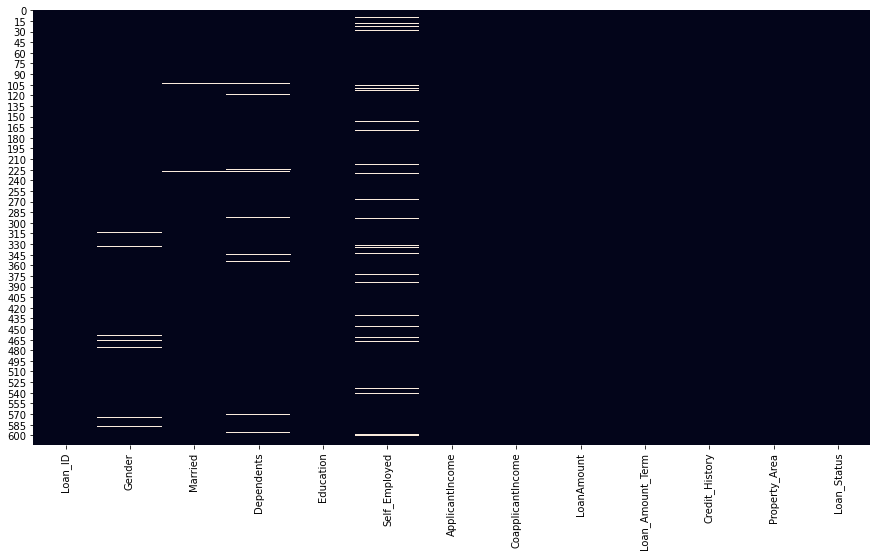

In [374]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df1.isnull(), cbar=False)

# display the plot
plt.show()

**Deal with Missing Values**

How to deal with missing data?

Depending on scenarios, you may:
a. Drop the whole row
b. Drop the whole column

OR replace:
a. The missing values with mean
b. The missing values with median
c. Replace it based on other functions


The entire column is dropped only if most entries (80%-90%) in the column are missing. We have the option to either drop the rows containing the missing values or replace them. In our dataset, there are not many values that are missing.

In [643]:
df=df1.replace(np.nan,0)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,50,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141,360,1,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267,360,1,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95,360,1,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158,360,0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168,360,1,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349,360,1,Semiurban,N


Replace those categorical missing values with mode of that column 

**Recheck summary statistics after replacement**

In [644]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,143.241042,340.651466,0.817590
std,6109.041673,2926.248369,85.915550,66.355848,0.386497
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,98.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,165.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


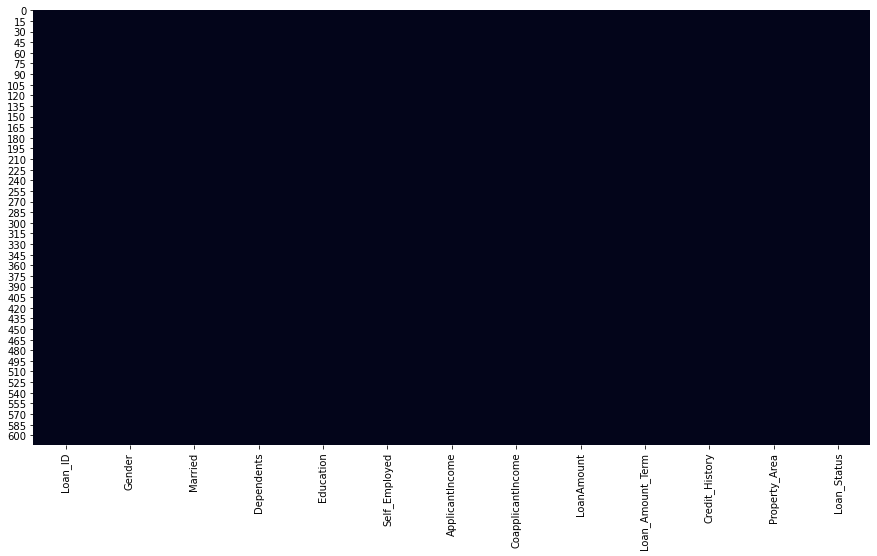

In [645]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot heatmap to check null values
# isnull(): returns 'True' for a missing value
# cbar: specifies whether to draw a colorbar; draws the colorbar for 'True' 
sns.heatmap(df.isnull(), cbar=False)

# display the plot
plt.show()

Let's view the missing value plot once again to see if the missing values have been imputed.

<a id='correlation'></a>
### 4.1.5 Correlation


<ul>
    <li>Correlation is the extent of linear relationship among numeric variables</li>
    <li>It indicates the extent to which two variables increase or decrease in parallel</li>
    <li>The value of a correlation coefficient ranges between -1 and 1</li>
    <li> Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which pairs are correlated</li>
    </ul>
    

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to compute the correlation matrix, we perform the following:
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter out only the numeric variables from the dataframe using select_dtypes() function**

In [646]:
# select the numerical features in the dataset using 'select_dtypes()'
# select_dtypes(include=np.number): considers the numeric variables
df_numeric_features = df.select_dtypes(include=np.number)

# print the names of the numeric variables 
df_numeric_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

The dataframe df_numeric_features has 7 numeric variables.

**2. Call the corr() function which will return the correlation matrix of numeric variables**

In [647]:
# generate the correlation matrix
corr =  df_numeric_features.corr()

# print the correlation matrix
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.548943,-0.040137,0.005298
CoapplicantIncome,-0.116605,1.000000,0.191279,-0.061301,0.003931
LoanAmount,0.548943,0.191279,1.000000,0.041884,0.019945
Loan_Amount_Term,-0.040137,-0.061301,0.041884,1.000000,0.017872
Credit_History,0.005298,0.003931,0.019945,0.017872,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

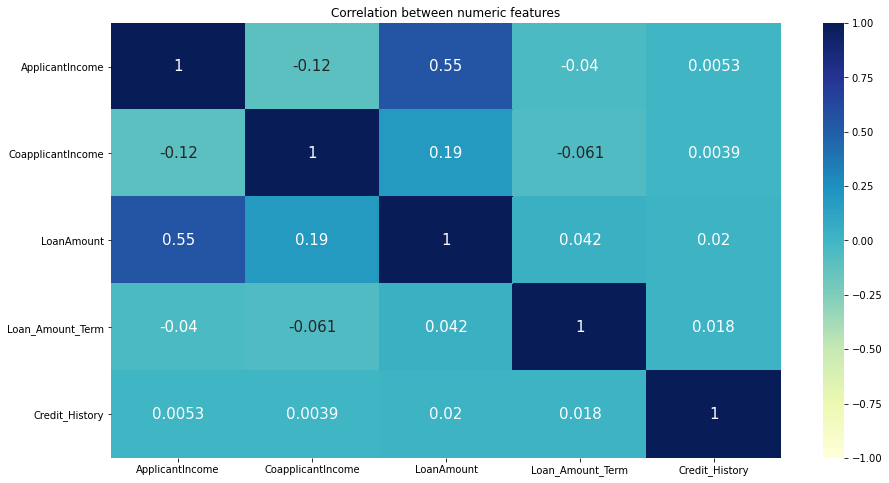

In [648]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: Sets the font size of the annotation
sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 15}, )

# specify name of the plot using plt.title()
plt.title('Correlation between numeric features')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be observed that the numeric variables are not correlated with each other since all the correlation coefficients are close to zero. It implies that there is no multicollinearity in the data.

<br>Recollect that one of the assumptions of linear regression is that, there should be NO Multicollinearity present in the data.</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='categorical'></a>
### 4.1.6 Analyze Categorical Variables

Categorical variables are those in which the values are labeled categories. The values, distribution, and dispersion of categorical variables are best understood with bar plots.

**First let us print the summary statistics of the categorical features**

In [380]:
# display the summary statistics of categorical variables
# include=objec: selects the categoric features
df.describe(include=object)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,385,385,385,385,385,385,385,385
unique,385,3,3,5,2,3,3,2
top,LP002925,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,308,245,228,305,315,152,311


There are 8 categorical variables. From the output we see that the variable Loan_ID has most number of categories. 
There are 614 numbers in the data, of which LP002652 occurs highest number of times.

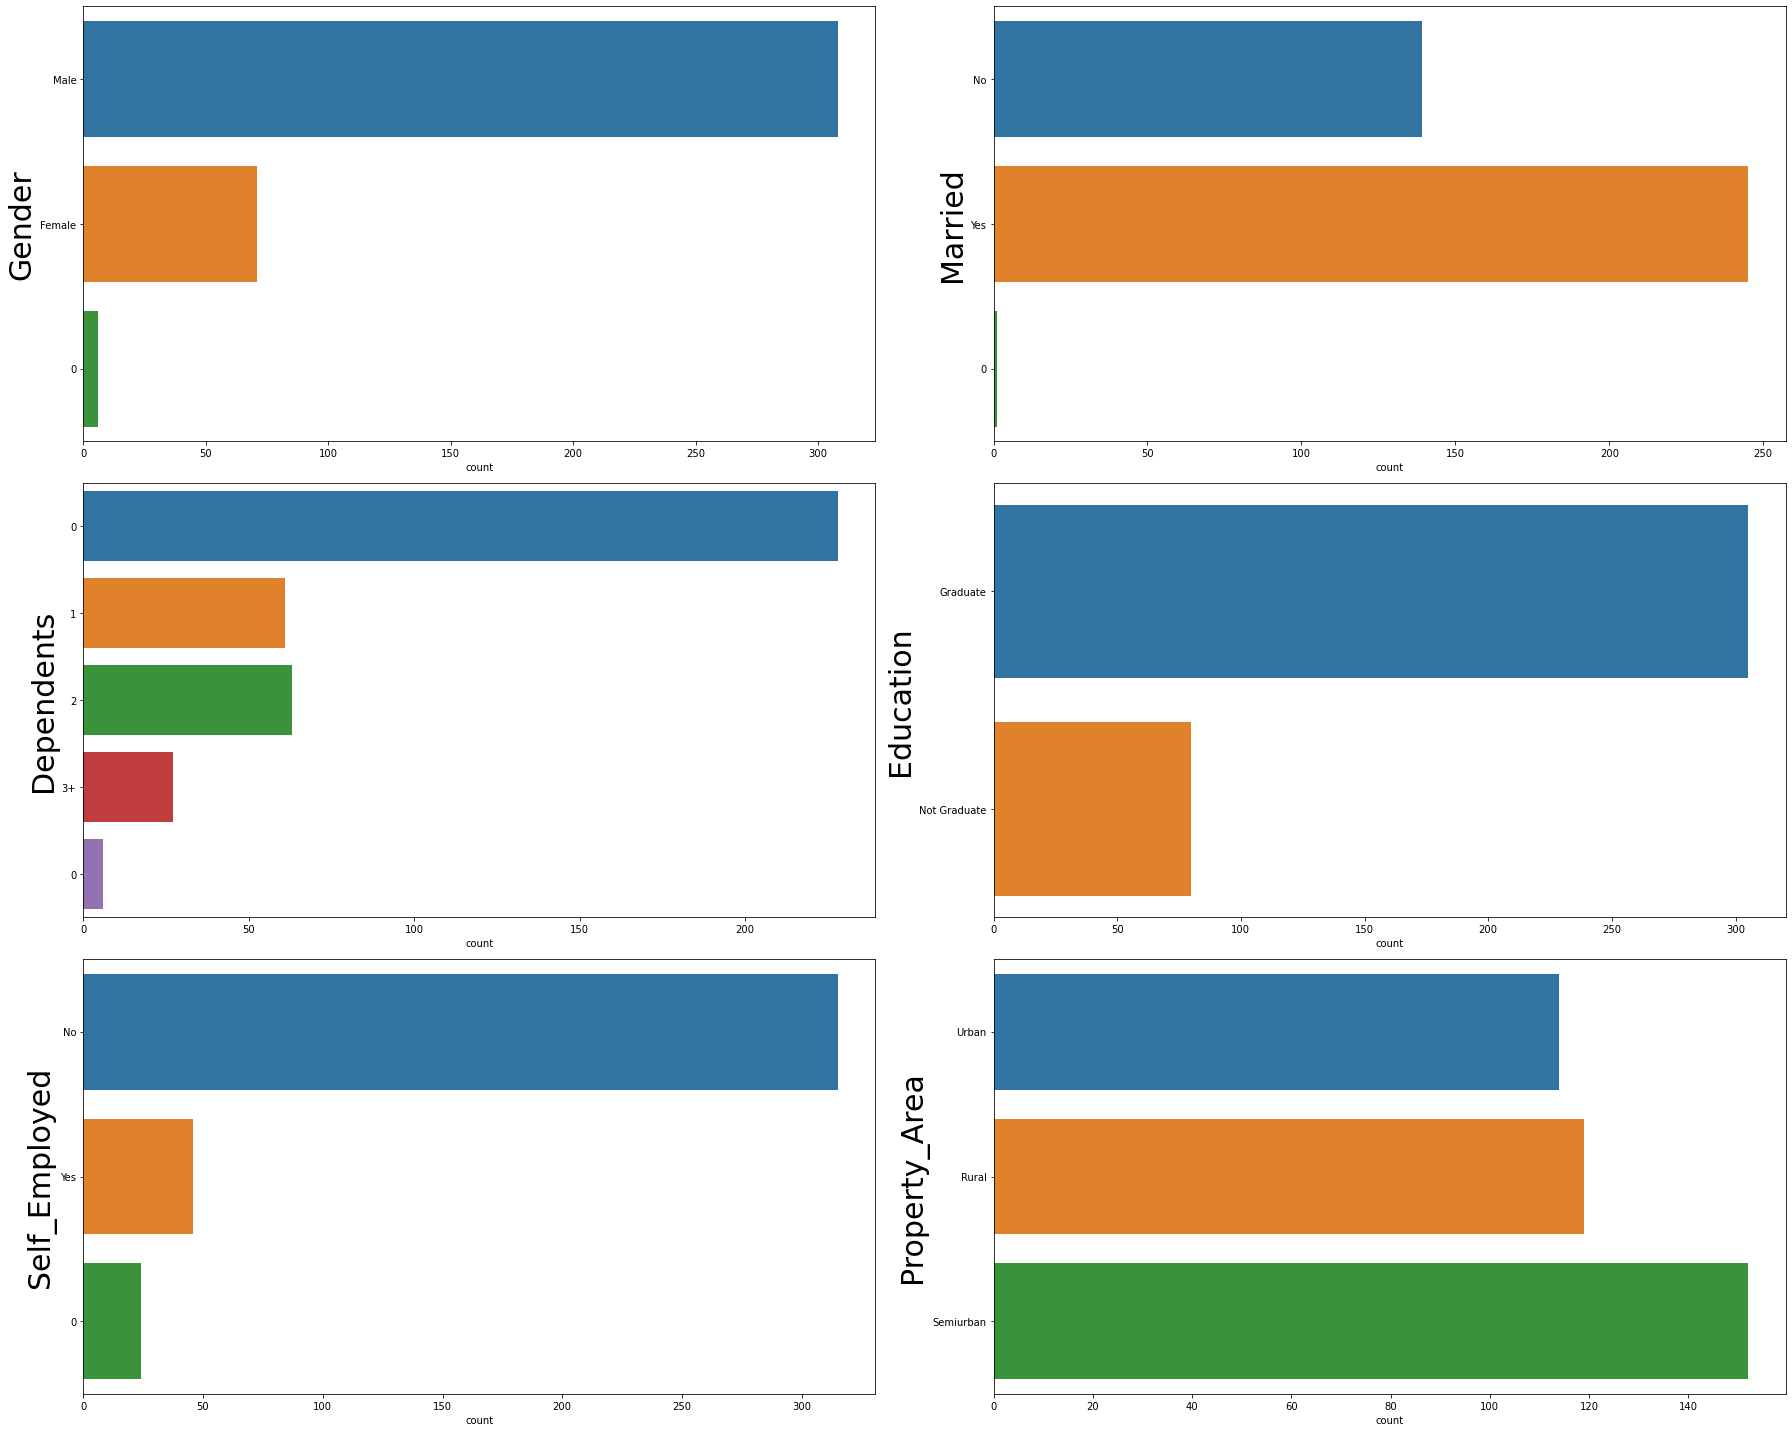

In [381]:
# create a list of all categorical variables
# include=object: selects the categoric features
# drop(['city'],axis=1): drops the Dependents column from the dataframe
df_categoric_features = df.select_dtypes(include='object').drop(['Loan_ID'], axis=1)

# plot the count distribution for each categorical variable 
# 'figsize' sets the figure size
fig, ax = plt.subplots(3, 2, figsize=(25, 20))

# plot a count plot for all the categorical variables
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # plot the count plot using countplot()
    # y: data on y axis
    # ax: specifies the axes object to draw the plot onto
    countplot = sns.countplot(y=df[variable], ax=subplot )
       
    # set the y-axis labels 
    # fontsize = 30: sets the font size to 30
    countplot.set_ylabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot we see that:<ul>
                        <li>Most of the loan applicants are Male than female</li>
                        <li>Most of the applicants are married </li>
                        <li>Property areas are semiurban than urban and rural but there is not much differnce.  </li>
                        <li>Most of the applicants are not self employed </li>
                        <li> Most of the applicants are Graduates </li>
                        <li>Most frequent data in dependents is zero. </li>
                        </ul></b>
                </font>
            </div>
        </td>
    </tr>
</table>

Now consider the variable Loan_ID

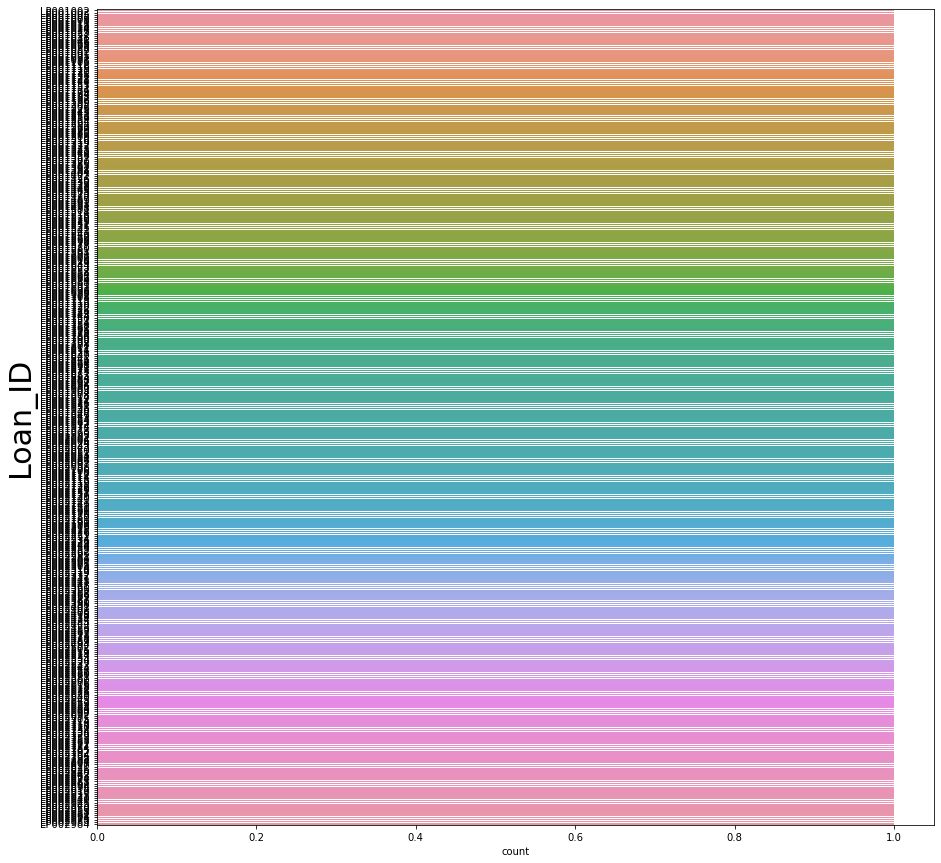

In [382]:
plt.figure(figsize=(15, 15))

# plot the count plot using countplot()
# y: specifies the data to be plotted on y-axis
# orient: specifies the orientation of the barplot. "h" is used for horizontal orientation
# by default the orientation is vertical; but can be specifies by "v"
countplot = sns.countplot(y=df['Loan_ID'], orient="h")

# set the x-axis labels 
# fontsize = 30: sets the font size to 30
countplot.set_ylabel('Loan_ID', fontsize = 30)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                     We see that there are many Loan_ID considered in the data. It is quite difficult to perform meaningful analysis on this variable.
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='categorical_numerical'></a>
### 4.1.7 Analyze Relationship Between Target and Categorical Variables
The box-and-whisker plot is commonly used for visualizing relationships between numerical variables and categorical variables.

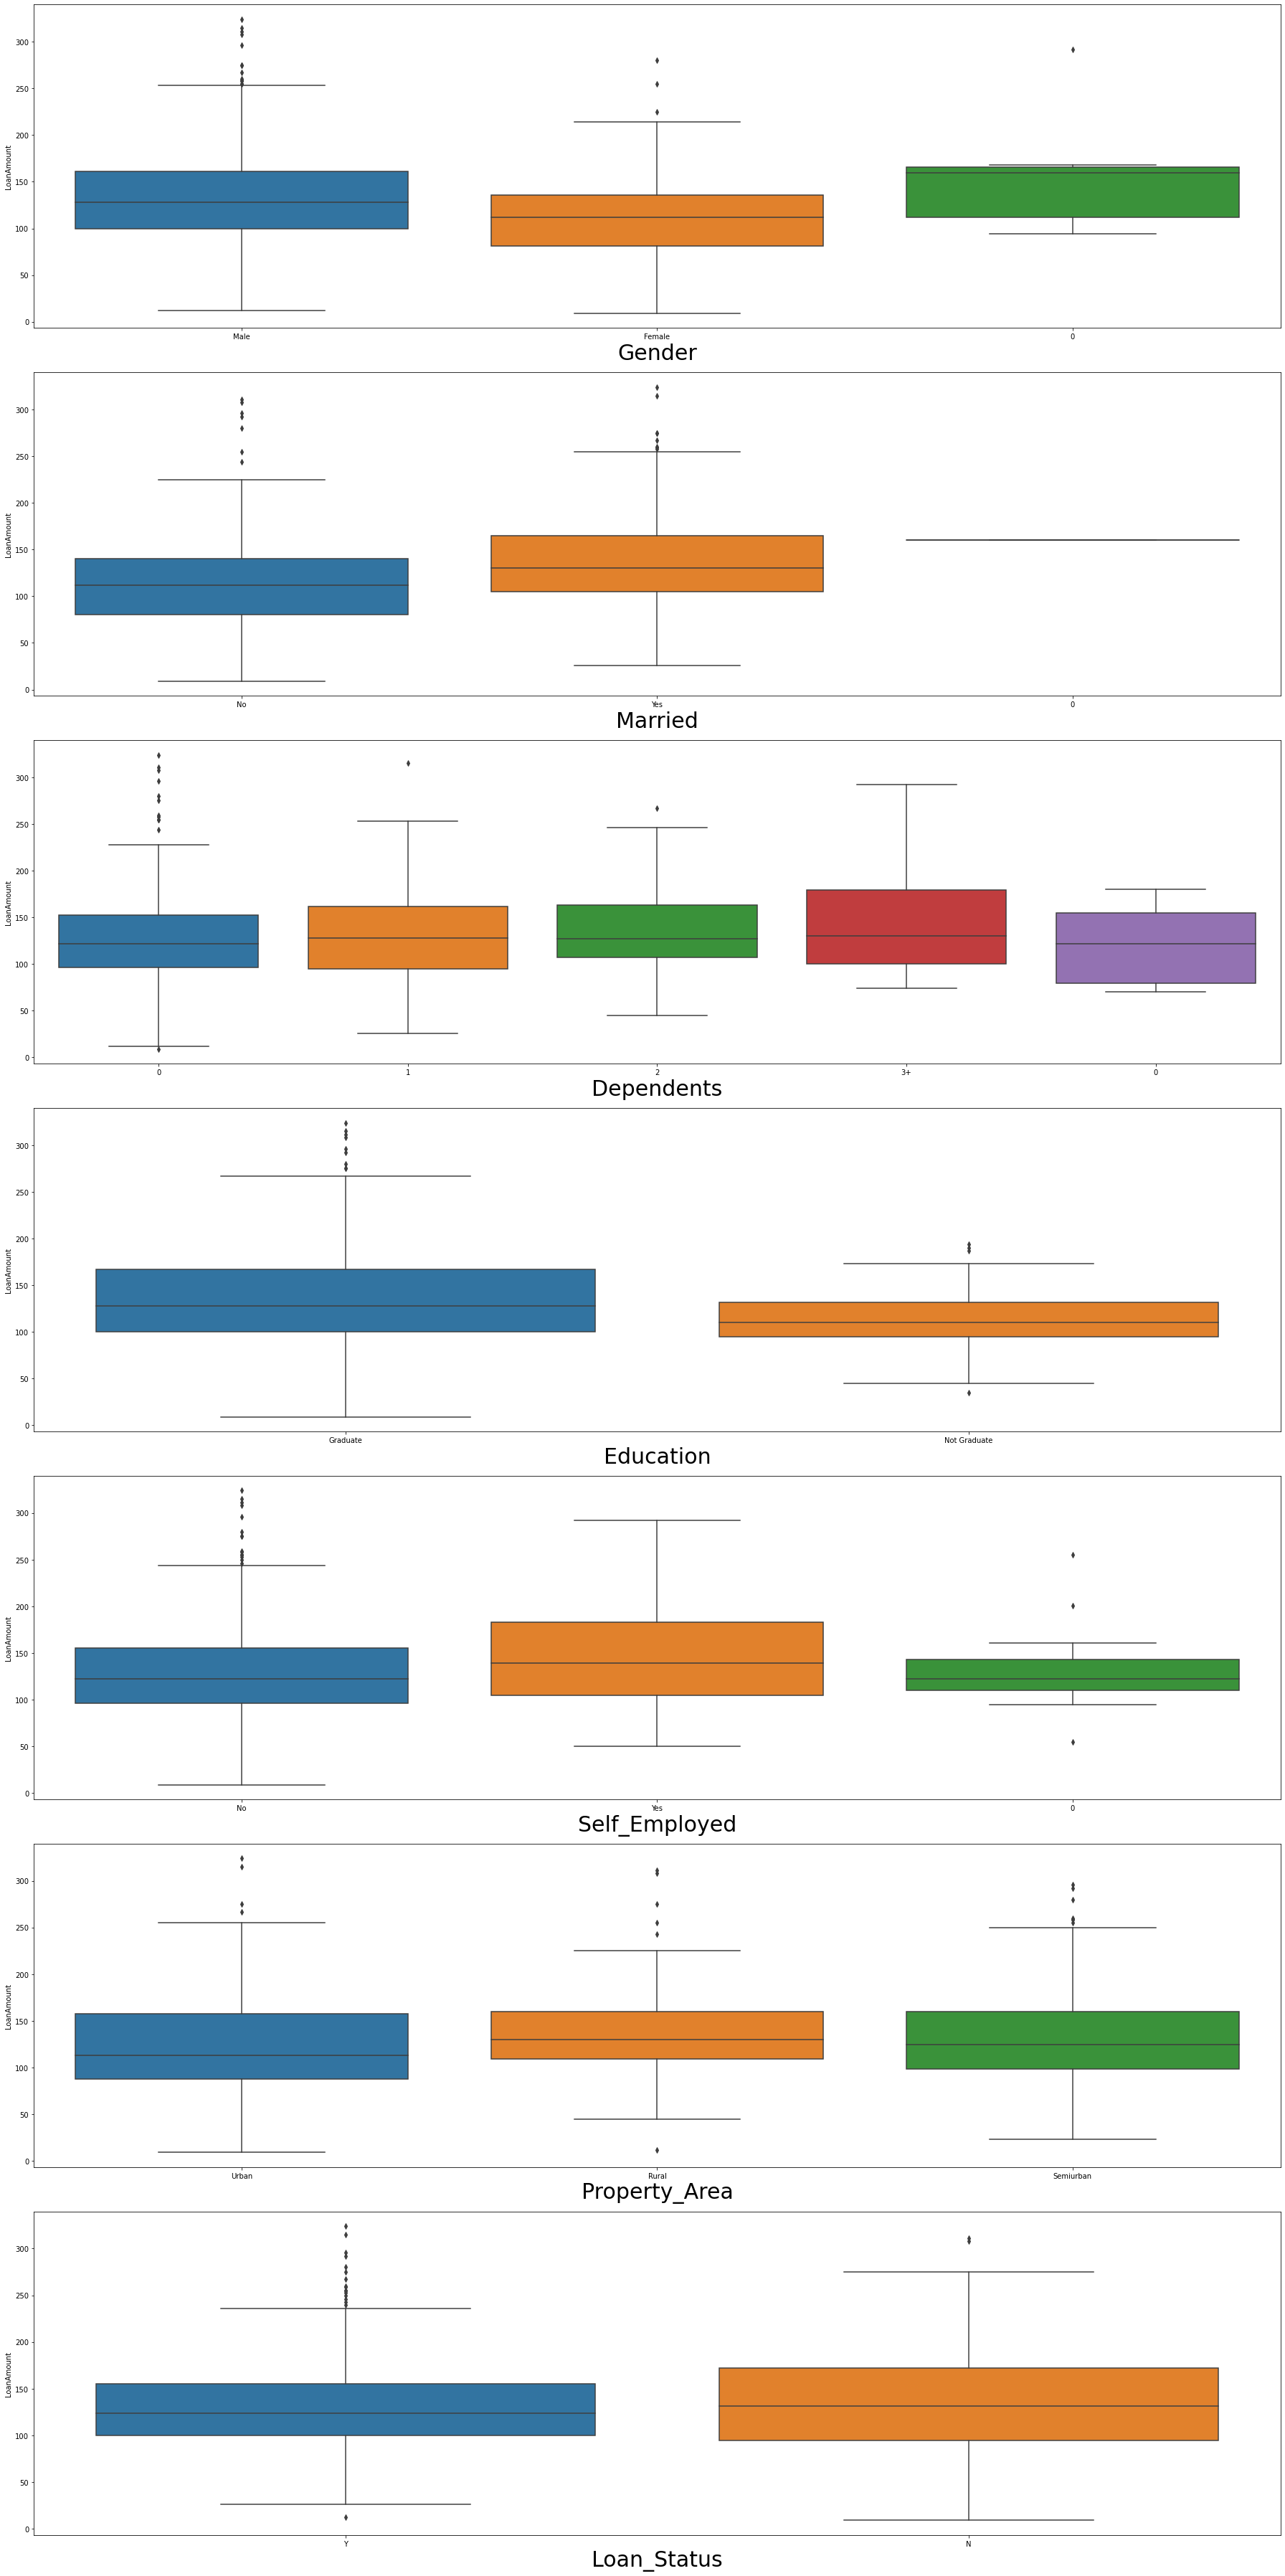

In [383]:
# plot the boxplot for each categorical variable 
# create subplots using subplots()
# 7 subplots in 7 rows and 1 columns
# 'figsize' sets the figure size
fig, ax = plt.subplots(7,1, figsize=(25, 50))

# plot a boxplot for all the categorical variables 
for variable, subplot in zip(df_categoric_features, ax.flatten()):
    
    # x: variable on x-axis
    # y: variable in y-axis
    # data: dataframe to be used
    # ax: specifies the axes object to draw the plot onto
    boxplt = sns.boxplot(x=variable, y='LoanAmount', data=df, ax=subplot)
    
    # set the x-axis labels 
    # fontsize = 30: sets the font size to 30
    boxplt.set_xlabel(variable, fontsize = 30)

# avoid overlapping of the plots using tight_layout()    
plt.tight_layout()   

# display the plot
plt.show() 

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot we can see medain amount for male holders are more-131 than female-114 holders loan amount of married-135 holders are greater than non married-118 holders Medium claim of loan amount with dependents more than 3 are 146.412 than other applicants with dependents less than 3 Graduates (134) recieved more amount of loan than non graduates(120) Self employed members recieved 146.412 than non self_employed holders There is not much differences in loan amount between the holders who belongs to urban-121,Rural-135,Semiurban-128,among these Rural applicants has got bit average high amount .</b>
                </font>
            </div>
        </td>
    </tr>
</table>


### 4.1.8 Feature Engineering

Adding applicant income and coapplicant income and create new feture as total income

In [384]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

<ipython-input-384-5f721981cdba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']


Check whether the new variable added into the data frame or not.

In [385]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,log_LA
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,50,360,1,Urban,Y,5849.000000,3.912023
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128,360,1,Rural,N,6091.000000,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66,360,1,Urban,Y,3000.000000,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120,360,1,Urban,Y,4941.000000,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141,360,1,Urban,Y,6000.000000,4.948760


**Analyze relationship between Toatl_Income and  LoanAmount variable**

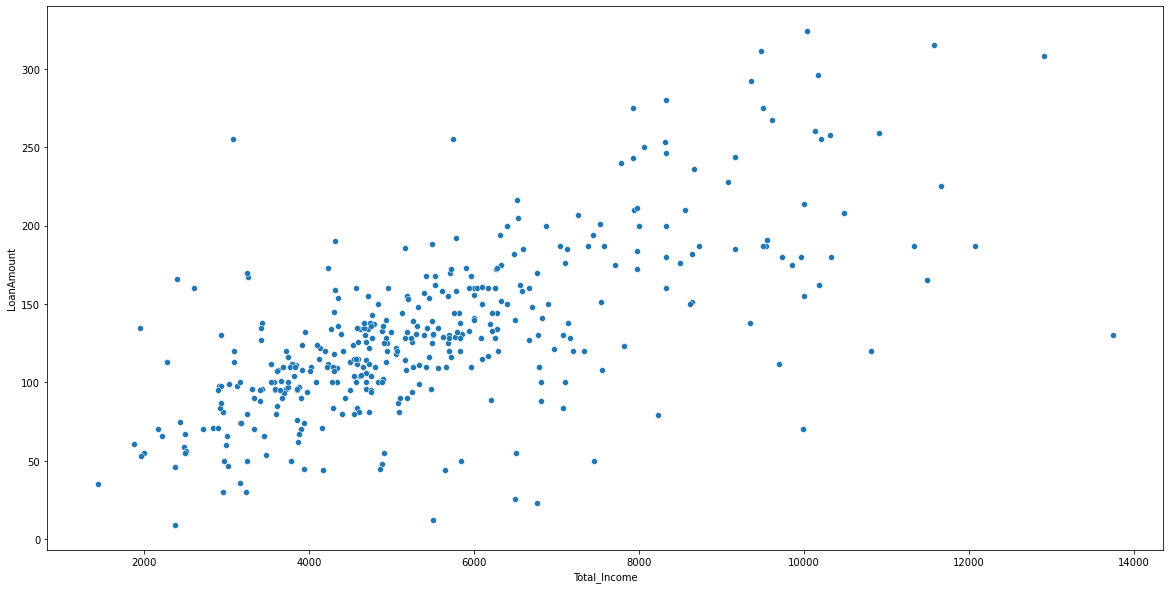

In [386]:
# set figure size
plt.figure(figsize=(20,10))

# boxplot of claim against region
# x: specifies the data on x axis
# y: specifies the data on y axis
# data: specifies the dataframe to be used
ax = sns.scatterplot(x="Total_Income", y="LoanAmount", data=df)



# show the plot
plt.show()

For Total income above 10000 the loan amount is high and most of the applicants income are below 10000.

<a id='outliers'></a>
### 4.1.9 Discover Outliers 

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

**Recollect that one of the assumptions of Linear Regression is there should be no outliers present in the data**

**1. Plot boxplot for numerical data**

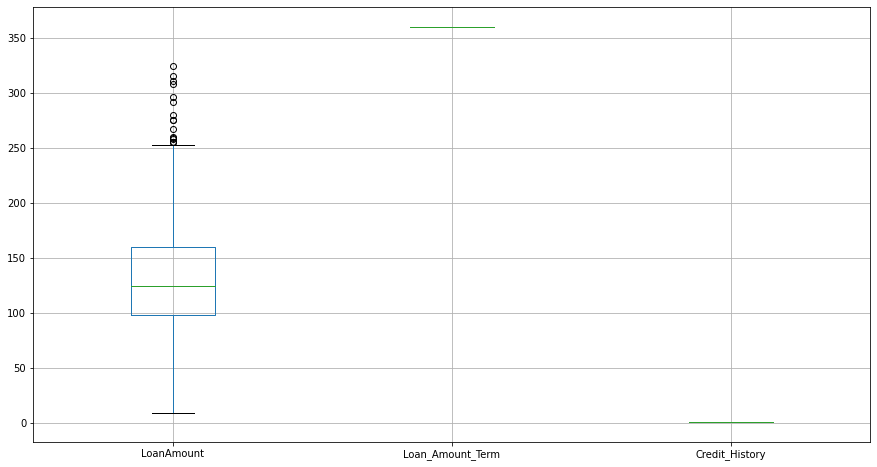

In [387]:
plt.rcParams['figure.figsize']=(15,8)

# create a boxplot for all numeric features
# column: selects the specified columns
df_numeric_features.boxplot(column=['LoanAmount','Loan_Amount_Term','Credit_History'])

# to display the plot
plt.show()

**2. Note the variables for which outliers are present**

From the above plot, we notice that for the variable 'LoanAmount' and 'Loan_Amount_Term' there are points above the upper extreme - these points are outliers
Let us use the IQR method to remove the outliers

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variable 'LoanAmount' and 'Loan_Amount_Term' there are points above the upper extreme - these points are outliers Let us use the IQR method to remove the outliers</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>



**3. Remove outliers by IQR method**

In [388]:
# calculate interquartile range 

# compute the first quartile using quantile(0.25)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q1 = df_numeric_features.drop(['LoanAmount'], axis=1).quantile(0.25)

# compute the first quartile using quantile(0.75)
# use .drop() to drop the target variable 
# axis=1: specifies that the labels are dropped from the columns
Q3 = df_numeric_features.drop(['LoanAmount'], axis=1).quantile(0.75)

# calculate of interquartile range 
IQR = Q3 - Q1

# print the IQR values for numeric variables
print(IQR)

ApplicantIncome     2397.000000
CoapplicantIncome   2250.000000
Loan_Amount_Term       0.000000
Credit_History         0.000000
Total_Income        2544.000000
log_LA                 0.490206
dtype: float64


In [389]:
# filter out the outlier values
# ~ : selects all rows which do not satisfy the condition
# |: bitwise operator OR in python
# any() : returns whether any element is True over the columns
# axis : "1" indicates columns should be altered (use "0" for 'index')
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

A simple way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed

In [390]:
df.shape

(349, 15)

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>So that the above output shows there is a reduction in the number of rows(from 614 to 349). Now, to confirm that the outliers have been removed let us visualize using a boxplot.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Plot boxplot to recheck for outliers**

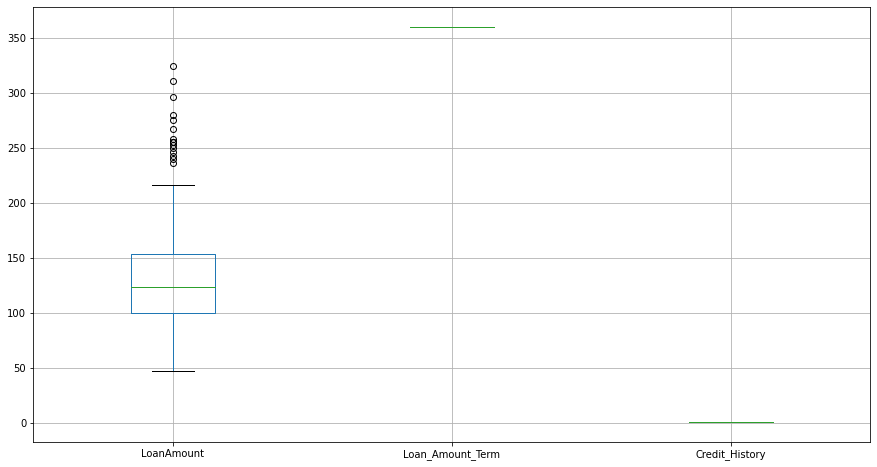

In [391]:
plt.rcParams['figure.figsize']=(15,8)

# recheck for outliers
# column: selects the specifies columns
df.boxplot(column=['LoanAmount','Loan_Amount_Term','Credit_History'])

# display only the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data. The new 'outliers' that you see are moderate outliers that lie within the min/max range before removing the actual outliers

<a id='Recheck_Correlation'></a>
### 4.1.10 Recheck the Correlation
Recheck the correlation after treating outliers. An outlier might either decrease or increase a correlation coefficient, depending on where it is in relation to the other points

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Recheck the correlation after removing the outliers:
                   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter out only the numeric variables from the dataframe**

In [392]:
# filter the numerical features in the dataset
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'log_LA'],
      dtype='object')

**2. Call the corr() function which will return the correlation matrix of numeric variables**

In [393]:
# generate the correlation matrix 
corr =  df_numeric_features.corr()

# print the correlation matrix
corr.replace(np.nan,0)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,log_LA
ApplicantIncome,1.000000,-0.311372,0.455196,0.000000,0.000000,0.658475,0.419323
CoapplicantIncome,-0.311372,1.000000,0.322023,0.000000,0.000000,0.510159,0.324999
LoanAmount,0.455196,0.322023,1.000000,0.000000,0.000000,0.667020,0.964754
Loan_Amount_Term,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Credit_History,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Total_Income,0.658475,0.510159,0.667020,0.000000,0.000000,1.000000,0.636908
log_LA,0.419323,0.324999,0.964754,0.000000,0.000000,0.636908,1.000000


**3. Pass the correlation matrix to the heatmap() function of the seaborn library to plot the heatmap of the correlation matrix**

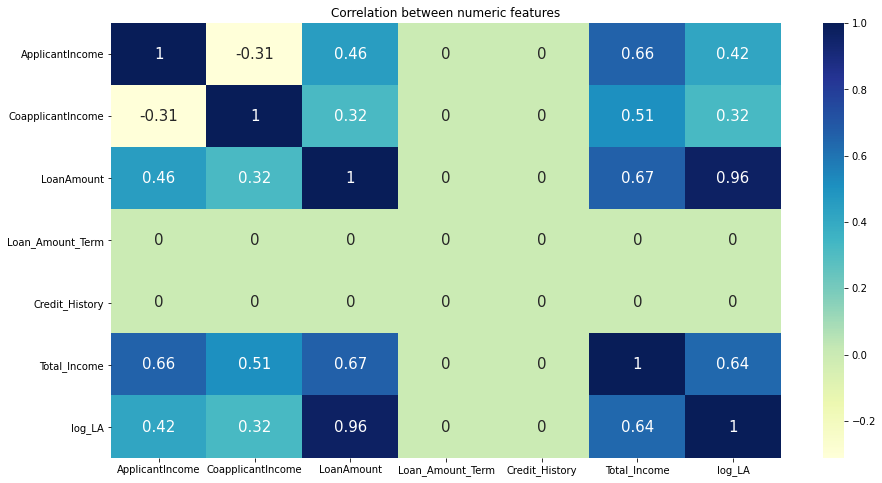

In [394]:
# set the figure size
plt.figure(figsize=(15, 8))

# plot the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
sns.heatmap(corr.replace(np.nan,0), cmap='YlGnBu', annot = True, annot_kws={"size": 15})

# specify name of the plot
plt.title('Correlation between numeric features')

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is seen that the numeric variables are not correlated with each other even after removing the outliers since almost all the correlation coefficients are zero. It implies that there is no multicollinearity in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

<a id='Normality'></a>
### 4.2.1 Check for Normality

As per the assumptions of linear regression, residuals (actual values - predicted values) should be normally distributed. If the target variable is normally distributed then the residuals are also normally distributed, thus we check the normality only for target variable.

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to check for normality of our target variable
                   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot a histogram and also perform the shapiro test**

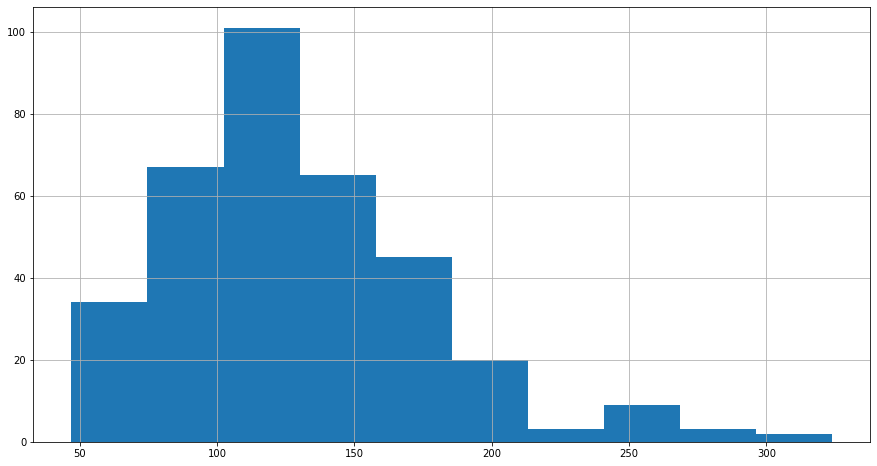

In [395]:
# check the distribution of target variable using hist()
df.LoanAmount.hist()

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we can notice that the variable 'LoanAmount' is right skewed and not normally distributed</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We should not only make conclusions through visual representations or only using a statistical test but perform multiple ways to get the best insights</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us perform the shapiro test to check the normality of the target variable.

The null and alternate hypothesis of shapiro test are as follows:

H0: The data is normally distributed
H1: The data is not normally distributed

In [396]:
from scipy import stats
from scipy.stats import shapiro
# normality test using shapiro
# the test returns the the test statistics and the p-value of the test
stat, p = shapiro(df["LoanAmount"])

# to print the numeric outputs of the shapiro test upto 2 decimal places
# %.2f: returns the a floating point with 2 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.2f, p-value=%.2f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.94, p-value=0.00
The data is not normally distributed (reject H0)


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is less than 0.05. So we have enough evidence to reject the null hypothesis. It can be concluded that the data is not normally distributed.<br>Now we opt for log transformation in order to reduce the skewness. We will log transform the Amount claim variable  <br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Usually for testing the normality of data, the Shaprio Wilk Test is used.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. If the data is not normally distributed, use log transformation to get near normally distributed data**

As mentioned above we opt for log transformation. The log transformation can be used to make skewed distributions less skewed. We use np.log() to log transform the 'LoanAmount' variable. We also store the transformed variable into our data frame with a new name, 'log_LA'.

In [397]:
# log transformation for normality using np.log()
df['log_LA'] = np.log(df['LoanAmount'])

df.head(5)



<ipython-input-397-f401d4bae615>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_LA'] = np.log(df['LoanAmount'])


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,log_LA
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,50,360,1,Urban,Y,5849.000000,3.912023
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128,360,1,Rural,N,6091.000000,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66,360,1,Urban,Y,3000.000000,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120,360,1,Urban,Y,4941.000000,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141,360,1,Urban,Y,6000.000000,4.948760


**3. Recheck for normality by plotting histogram and performing shapiro test**

Let us first plot a histogram of log_LoanAmount

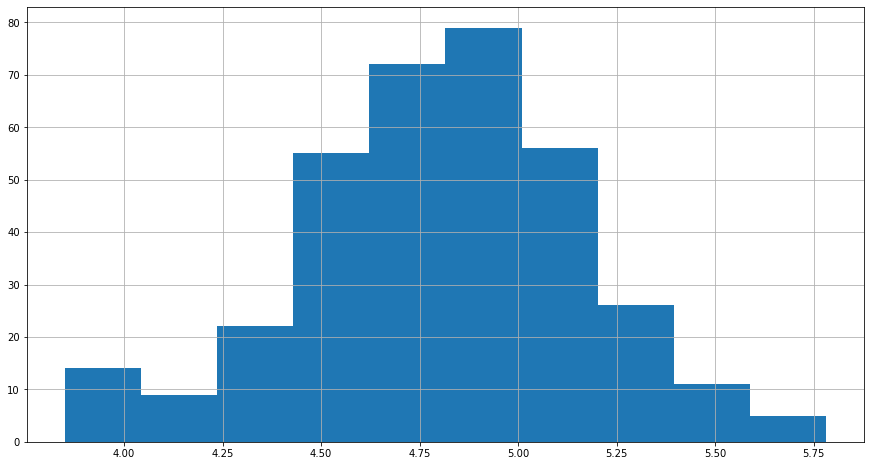

In [398]:
# recheck for normality 
# plot the histogram using hist
df.log_LA.hist()

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It can be seen that the variable claim is not normally distributed. However we again confirm by shapiro test</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [399]:
statn, pv = shapiro(df['log_LA'])
print('Statistics=%.2f, p-value=%.2f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.94, p-value=0.00
The data is not normally distributed (reject H0)


 shapiro test does not support the Loanamount value 

<a id='one_way_anova'></a>
### 4.2.2 One-Way Anova 

Perform One-Way ANOVA to compare two means from two independent (unrelated) groups. For example, we apply ANOVA to see whether the mean of LoanAmount is significantly different across gender

The null and alternate hypothesis of one-way anova are as follows:

H0: Population means all are equal
H1: Population means are not all equal

#### One Way Anova for 'Gender' on 'Amount'

In [400]:
f_oneway(df['LoanAmount'][df['Gender'] == 'Male'], 
             df['LoanAmount'][df['Gender'] == 'Female'])

F_onewayResult(statistic=7.554678753252883, pvalue=0.0063030694495790456)

The F-statistic = 10.64 and the p-value < 0.05, which indicates that there is a significant difference in the mean of the LoanAmount claim across gender.

<a id='dummy'></a>
### 4.2.3 Dummy Encoding of Categorical Variables

To build linear regression models we use OLS method. As seen before in section , it is seen that some variables are categorical. The OLS method fails to perform in presence of categorical variables. To overcome this we use dummy encoding.

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> We need to perform dummy encoding on our categorical variables before we proceed, since the method of OLS works only on numeric data <br><br>
                    In order to dummy encode, we do the following:</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter numerical and categorical variables**

In [401]:
# filter the numerical features in the dataset using select_dtypes()
# include=np.number: selects the numeric features
df_numeric_features = df.select_dtypes(include=np.number)

# display the numeric features
df_numeric_features.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Total_Income', 'log_LA'],
      dtype='object')

In [46]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_categoric_features = df.select_dtypes(include=[np.object])

# display categorical features
df_categoric_features.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

**2. Dummy encode the catergorical variables**

In [402]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_categoric_features = pd.concat([df_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_categoric_features.drop([col], axis=1, inplace=True)

**3. Concatenate numerical and dummy encoded categorical variables**

In [403]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_dummy = pd.concat([df_numeric_features, df_categoric_features], axis=1)

# display data with dummy variables
dummy=df_dummy.replace(np.nan,0)
# concatenate the numerical and dummy encoded categorical variables using concat()
dummy

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,log_LA,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849.000000,0.000000,50.000000,360.000000,1.000000,5849.000000,3.912023,0,1,1,0,1,0,0,0,0,1,0,0,1,1
1,4583.000000,1508.000000,128.000000,360.000000,1.000000,6091.000000,4.852030,0,1,0,1,0,1,0,0,0,1,0,0,0,0
2,3000.000000,0.000000,66.000000,360.000000,1.000000,3000.000000,4.189655,0,1,0,1,1,0,0,0,0,0,1,0,1,1
3,2583.000000,2358.000000,120.000000,360.000000,1.000000,4941.000000,4.787492,0,1,0,1,1,0,0,0,1,1,0,0,1,1
4,6000.000000,0.000000,141.000000,360.000000,1.000000,6000.000000,4.948760,0,1,1,0,1,0,0,0,0,1,0,0,1,1
5,5417.000000,4196.000000,267.000000,360.000000,1.000000,9613.000000,5.587249,0,1,0,1,0,0,1,0,0,0,1,0,1,1
6,2333.000000,1516.000000,95.000000,360.000000,1.000000,3849.000000,4.553877,0,1,0,1,1,0,0,0,1,1,0,0,1,1
8,4006.000000,1526.000000,168.000000,360.000000,1.000000,5532.000000,5.123964,0,1,0,1,0,0,1,0,0,1,0,0,1,1
10,3200.000000,700.000000,70.000000,360.000000,1.000000,3900.000000,4.248495,0,1,0,1,0,0,1,0,0,1,0,0,1,1
11,2500.000000,1840.000000,109.000000,360.000000,1.000000,4340.000000,4.691348,0,1,0,1,0,0,1,0,0,0,0,0,1,1


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Thus we have obtained the dummy coded variables.<br>

Note: Now the categorical variables are dummy encoded creating n-1 variables for each categorical variables, where n is the number of classes in each categorical variable. So for variable loan_id,coapplicants,and area has encoded into n-1 dummy variables.Loanamount has coded as 2 categorical variables</br></b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us now proceed to train models. One model with the original claim variable and another model with the log transformed claim variable. We shall begin by fitting a linear regression model using the method of ordinary least square(OLS) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='LinearRegression'></a>
## 5. Linear Regression (OLS)

<a id='withLog'></a>
### 5.1 Multiple Linear Regression - Full Model - with Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

**1. Split the data into training and test sets**

In [404]:
# add the intercept column to the dataset
dummy = sm.add_constant(dummy)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = dummy.drop(['LoanAmount','log_LA'], axis=1)

# extract the target variable from the data set
y = dummy[['LoanAmount','log_LA']]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (288, 20)
The shape of X_test is: (97, 20)
The shape of y_train is: (288, 2)
The shape of y_test is: (97, 2)


**2. Build model using sm.OLS().fit()**

In [405]:
linreg_full_model_withlog = sm.OLS(y_train["log_LA"], X_train).fit()

**3. Predict the values using test set**

In [408]:
# predict the 'log_LA' using predict()
linreg_full_model_withlog_predictions = linreg_full_model_withlog.predict(X_test)

In [409]:
# take the exponential of predictions using np.exp()
predicted = np.exp(linreg_full_model_withlog_predictions)

# extract the 'amount' values from the test data
actual= y_test['log_LA']


**4. Compute accuracy measures**



Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [410]:
# calculate rmse using rmse()
linreg_full_model_withlog_rmse = rmse(actual, predicted)

# calculate R-squared using rsquared
linreg_full_model_withlog_rsquared = linreg_full_model_withlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withlog_rsquared_adj = linreg_full_model_withlog.rsquared_adj 

**5. Tabulate the results**

In [411]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

# print the score card
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE


In [412]:
# compile the required information
linreg_full_model_withlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model with log of target variable",
                     'RMSE':linreg_full_model_withlog_rmse,
                     'R-Squared': linreg_full_model_withlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Let us also take a look at building a linear regression full model without performing any kind of transformation on target variable
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='withoutLog'></a>
### 5.2 Multiple Linear Regression - Full Model - without Log Transformed Dependent Variable (OLS)

In this section we build a full model with linear regression using OLS (Ordinary Least Square) technique. By full model we indicate that we consider all the independent variables that are present in the dataset.

In this case, we do not consider any kind of transformation on the dependent variable, we use the 'loanamount' variable as it is.

In [413]:
# ordinary least squares regression
# we use the train and test sets from the previous model
# however, now we shall build a model using the variable 'claim' 

# build a full model using OLS()
linreg_full_model_withoutlog = sm.OLS(y_train['LoanAmount'], X_train).fit()

# print the summary output
print(linreg_full_model_withoutlog.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     33.30
Date:                Sun, 09 May 2021   Prob (F-statistic):           2.52e-56
Time:                        22:03:30   Log-Likelihood:                -1415.9
No. Observations:                 288   AIC:                             2868.
Df Residuals:                     270   BIC:                             2934.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 67.7% of the variation in dependent variable claim.The Durbin-Watson test statistics is 2.126 and indicates that there is no autocorrelation. The Condition Number 7380 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Condition Number : One way to assess multicollinearity is to compute the condition number(CN). If CN is less than 100, there is no multicollinearity. If CN is between 100 and 1000, there is moderate multicollinearity and if CN is greater 1000 there is severe multicollinearity in the data <br><br>
                        Durbin-Watson : The Durbin-Watson statistic will always have a value between 0 and 4. A value of 2.0 means that there is no autocorrelation detected in the sample. Values from 0 to less than 2 indicate positive autocorrelation and values from from 2 to 4 indicate negative autocorrelation      
                </font>
            </div>
        </td>
    </tr>
</table>

#### Calculate the p-values to know the insignificant variables

In [414]:
# calculate the p-values for all the variables
# create a dataframe using pd.DataFrame()
# columns: specifies the column names
linreg_full_model_withoutlog_pvalues = pd.DataFrame(linreg_full_model_withoutlog.pvalues, columns=["P-Value"])

# print the values
linreg_full_model_withoutlog_pvalues

,P-Value
const,0.149217
ApplicantIncome,0.000000
CoapplicantIncome,0.000136
Loan_Amount_Term,0.000021
Credit_History,0.000021
Total_Income,0.000000
Gender_Female,0.691314
Gender_Male,0.686045
Married_No,0.037867
Married_Yes,0.080954


The above table shows the p-values for all the variables to decide the significant variables

Let's create a list of insignificant variables

In [415]:
# select insignificant variables
insignificant_variables = linreg_full_model_withoutlog_pvalues[
                                                        linreg_full_model_withoutlog_pvalues['P-Value']  > 0.05]

# get the position of a specified value
insigni_var = insignificant_variables.index

# convert the list of variables to 'list' type
insigni_var = insigni_var.to_list()

# get the list of insignificant variables
insigni_var

['const',
 'Gender_Female',
 'Gender_Male',
 'Married_Yes',
 'Dependents_0',
 'Dependents_1',
 'Dependents_3+',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Semiurban',
 'Property_Area_Urban',
 'Loan_Status_Y']

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> These are the insignificant variables because their p-value is greater than 0.05.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Predict the values using test set**

In [416]:
# predict the claim using predict()
predicted_LoanAmount = linreg_full_model_withoutlog.predict(X_test)

# extract the 'claim' values from the test data
actual_LoanAmount = y_test['LoanAmount']


**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [417]:
# calculate rmse using rmse()
linreg_full_model_withoutlog_rmse = rmse(actual_LoanAmount, predicted_LoanAmount)

# calculate R-squared using rsquared
linreg_full_model_withoutlog_rsquared = linreg_full_model_withoutlog.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_full_model_withoutlog_rsquared_adj = linreg_full_model_withoutlog.rsquared_adj 

**4. Tabulate the results**

In [418]:
# compile the required information
linreg_full_model_withoutlog_metrics = pd.Series({
                     'Model_Name': "Linreg full model without log of target variable",
                     'RMSE':linreg_full_model_withoutlog_rmse,
                     'R-Squared': linreg_full_model_withoutlog_rsquared,
                     'Adj. R-Squared': linreg_full_model_withoutlog_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_full_model_withoutlog_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the R-squared and the Adjusted R-squared value for the model considering log transformation of the variable 'claim' is lower than the other model. And, the RMSE value of the model without considering the log transformation is considerably lower. So, we continue with variable 'claim' as it is, instead of opting for log transformation
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Finetuning'></a>
## 5.3. Fine Tune Linear Regression Model (OLS)

<a id='RemovingInsignificantVariable'></a>
### 5.3.1 Linear Regression after Removing Insignificant Variable (OLS)

The null and alternate hypothesis of linear regression as follows: <br>
    
    H0: All beta coefficients are zero
    H1: At least one beta coefficient is not zero

From the summary output of our linear regression model in section 5.2, we notice some of the variables are insignificant.

Now, we go ahead and build our next model without considering the above mentioned insignificant variables.

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In order to build the linear regression model after removing insignificant variable, we do the following:</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Consider the significant variables**

In [419]:
# drop the insignificant variables
X_significant = df.drop(["Loan_ID","LoanAmount","log_LA","Education","Gender","Married"], axis=1)

In [420]:
# filter the categorical features in the dataset using select_dtypes()
# include=[np.object]: selects the categoric features
df_significant_categoric_features = X_significant.select_dtypes(include=[np.object])

# display categorical features
df_significant_categoric_features.columns

Index(['Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status'], dtype='object')

**Dummy encode the catergorical variables**

In [421]:
# create data frame with only categorical variables that have been encoded

# for all categoric variables create dummy variables
for col in df_significant_categoric_features.columns.values:
    
    # for a feature create dummy variables using get_dummies()
    # prefix: specify the prefix before creating the dummy variable
    # "drop_first=True": creates 'n-1' dummy variables
    dummy_encoded_variables = pd.get_dummies(df_significant_categoric_features[col], prefix=col, drop_first=True)
    
    # concatenate the categoric features with dummy variables using concat()
    # axis=1: specifies that the concatenation is column wise
    df_significant_categoric_features = pd.concat([df_significant_categoric_features, dummy_encoded_variables],axis=1)
    
    # drop the orginal categorical variable from the dataframe
    # axis=1: specifies that the column is to be dropped
    # inplace: makes permanent changes in the dataframe
    df_significant_categoric_features.drop([col], axis=1, inplace=True)

**Concatenate numerical and dummy encoded categorical variables**

In [422]:
# concatenate the numerical and dummy encoded categorical variables using concat()
# axis=1: specifies that the concatenation is column wise
df_loan_significant = pd.concat([df_numeric_features, df_significant_categoric_features], axis=1)

# display data with dummy variables
significant=df_loan_significant
significant

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,log_LA,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.000000,50,360,1,5849.000000,3.912023,1,0,0,0,1,0,0,1,1
1,4583,1508.000000,128,360,1,6091.000000,4.852030,0,1,0,0,1,0,0,0,0
2,3000,0.000000,66,360,1,3000.000000,4.189655,1,0,0,0,0,1,0,1,1
3,2583,2358.000000,120,360,1,4941.000000,4.787492,1,0,0,0,1,0,0,1,1
4,6000,0.000000,141,360,1,6000.000000,4.948760,1,0,0,0,1,0,0,1,1
5,5417,4196.000000,267,360,1,9613.000000,5.587249,0,0,1,0,0,1,0,1,1
6,2333,1516.000000,95,360,1,3849.000000,4.553877,1,0,0,0,1,0,0,1,1
8,4006,1526.000000,168,360,1,5532.000000,5.123964,0,0,1,0,1,0,0,1,1
10,3200,700.000000,70,360,1,3900.000000,4.248495,0,0,1,0,1,0,0,1,1
11,2500,1840.000000,109,360,1,4340.000000,4.691348,0,0,1,0,0,0,0,1,1


**2. Split the data into training and test sets**

In [423]:
# add the intercept column to the dataset
significant = sm.add_constant(significant)

# separate the independent and dependent variables
# drop(): drops the specified columns
# axis=1: specifies that the column is to be dropped
X = significant.drop(['LoanAmount','log_LA'], axis=1)

# extract the target variable from the data set
y = significant[['log_LA','LoanAmount']]

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_significant, X_test_significant, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (288, 20)
The shape of X_test is: (97, 20)
The shape of y_train is: (261, 2)
The shape of y_test is: (88, 2)


**1. Build model using sm.OLS().fit()**

In [424]:
# build a full model with significant variables using OLS()
linreg_model_with_significant_var = sm.OLS(y_train['LoanAmount'], X_train_significant).fit()

# to print the summary output
print(linreg_model_with_significant_var.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     17.95
Date:                Sun, 09 May 2021   Prob (F-statistic):           4.11e-26
Time:                        22:05:22   Log-Likelihood:                -1300.2
No. Observations:                 261   AIC:                             2624.
Df Residuals:                     249   BIC:                             2667.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
ApplicantIncome           

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 44.2% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.927 and indicates that there is no autocorrelation. The Condition Number is 8930 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**2. Predict the values using test set**

In [425]:
# predict the 'LoanAmount' using predict()
predicted= linreg_model_with_significant_var.predict(X_test_significant)

# extract the 'LoanAmount' values from the test data
actual = y_test['LoanAmount']

**3. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [426]:
# calculate rmse using rmse()
linreg_model_with_significant_var_rmse = rmse(actual, predicted)

# calculate R-squared using rsquared
linreg_model_with_significant_var_rsquared = linreg_model_with_significant_var.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_var_rsquared_adj = linreg_model_with_significant_var.rsquared_adj 

**4. Tabulate the results**

In [427]:
# compile the required information
linreg_model_with_significant_var_metrics = pd.Series({
                     'Model_Name': "Linreg full model with significant variables",
                     'RMSE': linreg_model_with_significant_var_rmse,
                     'R-Squared': linreg_model_with_significant_var_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_var_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_var_metrics, ignore_index=True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374


From the above model linearity checking we can see that RMSE  value is higher than the other values.R-Squared value and Adjusted 
R-Squared value are reducing step by step ,so for further analysis we use unscaled data

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Occams razor is a principle to explain the phenomena by the simplest hypothesis possible. Our last model where we have removed the insignificant variables is performimg very close to the other models inspite of having lesser number of variables. Using Occams razor principle, we accept the model in which we consider the model with significant variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Assumptions'></a>
### 5.3.2 Check the Assumptions of the Linear Regression

Now we perform test for checking presence of Autocorrelation and Heteroskedasticity.

<a id='Autocorrelation'></a>
### 5.3.2.1 Detecting Autocorrelation

Autocorrelation (also called serial correlation) refers to the degree of correlation between the values of the same variables across different observations in the data. One of the assumptions of the linear regression is that there should not be autocorrelation.

The Durbin Watson Test is a measure of autocorrelation in residuals from the regression analysis.
Autocorrelation being present typically indicates that we are missing some information that should be captured by the model.

The null and alternate hypothesis of Durbin-Watson test is as follows: <br>
        
          H0: There is no autocorrelation in the residuals
          H1: There is autocorrelation in the residuals

**The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation**

**From the summary output in section 5.3.1, we see that the Durbin-Watson static is  1.980**

**Hence we can conclude that there is no autocorrelation**

We can also find out the p-value associated with the Durbin-Watson statistic from Durbin_Watson table in order to reject or fail to reject the null hypothesis

<a id='Heteroskedasticity'></a>
### 5.3.2.2 Detecting Heteroskedasticity
Heteroskedasticity is a systematic change in the spread of the residuals over the range of measured values. One of the assumptions of the linear regression is that there should not be Heteroskedasticity.

Breusch-Pagan is the test for detecting heteroskedasticity:

The null and alternate hypothesis of Breusch-Pagan test is as follows:<BR>
    
    H0: The residuals are homoskedastic
    H1: The residuals are not homoskedastic

In [428]:
# create vector of result parmeters
name = ['f-value','p-value']           

# perform Breusch-Pagan test using het_breushpagan()
# compute residuals using 'resid'
# 'exog' returns the independent variables in the model alng with the intercept
test = sms.het_breuschpagan(linreg_model_with_significant_var.resid, linreg_model_with_significant_var.model.exog)

# print the output
# use 'lzip' to zip the column names and test results
lzip(name, test)   

[('f-value', 28.818756422141472), ('p-value', 0.0069445163677964595)]

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>We observe that p-value is less than 0.05 and thus reject the null hypothesis. We conclude that there is heteroskedasticity present in the data. In real life it might not be possible to meet all the assumptions of linear regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<a id='Linearity_of_Residuals'></a>
### 5.3.2.3 Linearity of Residuals

Multiple linear regression requires the relationship between the independent and dependent variables to be linear, i.e. it should be linear in the parameters. The linearity assumption can best be tested with scatterplots.<br><br>The independent variables must have a linear relationship with the dependent variable.

C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\durga\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\durga\anacond

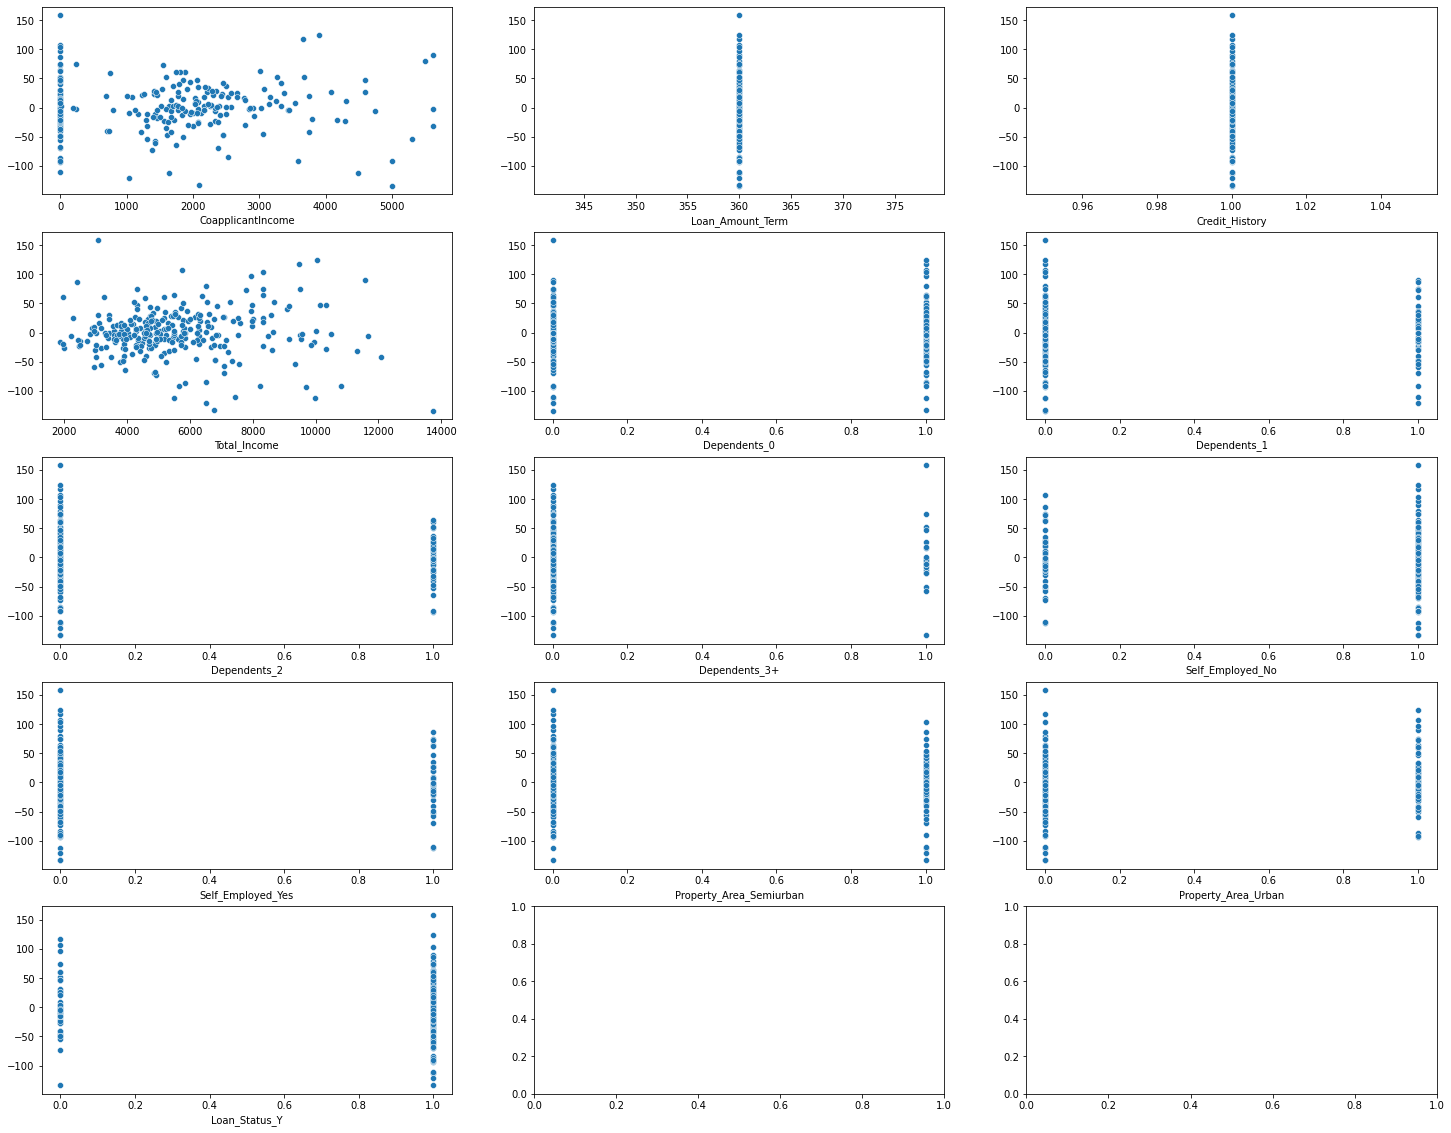

In [319]:
# create subplots of scatter plots
# pass the number of rows in a subplot to 'nrows'
# pass the number of columns in a subplot to 'ncolumns'
# set plot size using 'figsize'
fig, ax = plt.subplots(nrows = 5, ncols=3 , figsize=(25, 20))

# use for loop to create scatter plot for residuals and each independent variable (do not consider the intercept)
# 'ax' assigns axes object to draw the plot onto 
for variable, subplot in zip(X_train_significant.columns[1:], ax.flatten()):
    sns.scatterplot(X_train_significant[variable], linreg_model_with_significant_var.resid , ax=subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the plots we see that none of the plots show a specific pattern. Hence, we may conclude that the variables are linearly related to the dependent variable.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Normality_of_Residuals'></a>
### 5.3.2.4 Normality of Residuals

The assumption of normality is an important assumption for many statistical tests. The normal Q-Q plot is one way to assess normality. This q-q or quantile-quantile is a scatter plot which helps us validate the assumption of normal distribution in a data set.

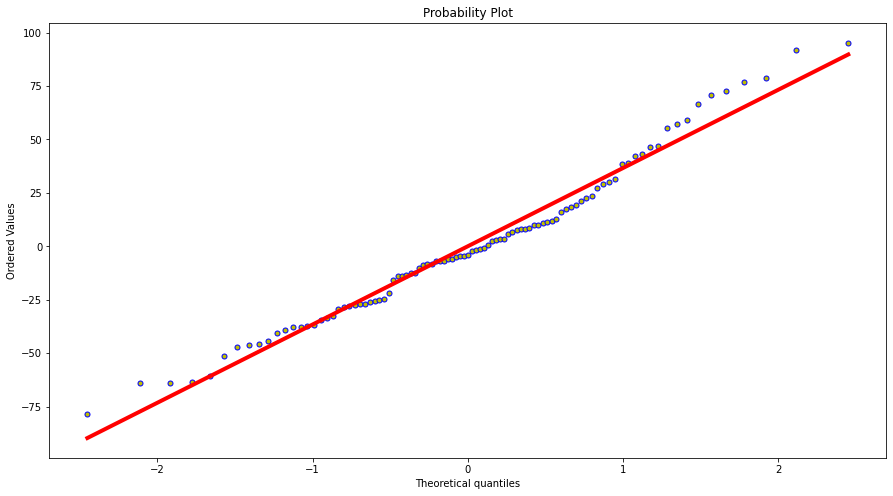

In [327]:
# calculate fitted values
fitted_vals = linreg_model_with_significant_var.predict(X_test_significant)

# calculate residuals
resids = actual_claim - fitted_vals

# create subplots using subplots() such that there is one row having one plot
# 'figsize' sets the figure size
fig, ax = plt.subplots(1, 1, figsize=(15, 8))

# plot the probability plot to check the normality of the residuals
# plot: if specified plots the least squares fit
stats.probplot(resids, plot=plt)

# set the marker type using the set_marker() parameter
# access the line object from the axes object using ax.get_lines()
# then, the properties can be changed accordingly
# set the marker to 'o' to use circles as points
ax.get_lines()[0].set_marker('o')

# set the marker size using the set_markersize() parameter
# set the marker size to 5
ax.get_lines()[0].set_markersize(5.0)

# set the color of the trend line using set_markerfacecolor()
# set color of the trend line to red by passing 'r' to the set_markerfacecolor
ax.get_lines()[0].set_markerfacecolor('y')

# set the trend line width
ax.get_lines()[1].set_linewidth(4.0)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Using this plot, we can infer that the residuals do not come from a normal distribution. This is possible since our target variable is not normally distributed.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**The mean of the residuals always equals zero (assuming that your line is actually the line of “best fit”)**

In [329]:
# check the mean of the residual
linreg_model_with_significant_var.resid.mean()

-9.246924213989082e-14

The mean of the residuals is away from  zero. Therefore, we can say that linearity is not present.

**Perform shapiro test to check normality of the residuals**

In [334]:
# normality test using 'shapiro'
# the test returns the the test statistics and the p-value of the test
stat, p = shapiro(resids)

# to print the numeric outputs of the shapiro test upto 2 decimal places
# %.3f: returns the a floating point with 2 decimal digit accuracy
# the '%' holds the place where the number is to be printed
print('Statistics=%.3f, p-value=%.2f' % (stat, p))

# display the conclusion
# set the level of significance to 0.05
alpha = 0.05

# if the p-value is greater than alpha print we accept alpha 
# if the p-value is less than alpha print we reject alpha
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')

Statistics=0.977, p-value=0.09
The data is normally distributed (fail to reject H0)


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>It is apparent that the p-value is greater than 0.05. So we have enough evidence fail to reject the null hypothesis. It can be concluded that the residuals is normally distributed.<br><br>
                    </b> </font>
            </div>
        </td>
    </tr>
</table>


<a id='RemovingInsignificantVariable_scaleddata'></a>
### 5.3.3 Linear Regression after Removing Insignificant Variable (OLS) - Scaled Data

Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model that relies on the distribution of attributes such as Gaussian processes.<br><br>
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).<br><br>

Let's build a model on significant variables using standardization.

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To build the linear regression model after removing insignificant variable on standardized data, we do the following:</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Perform standardization on train data**

In [350]:
# scale the numeric variables
# apply(): applies the operaction passed to each feature in 'df_numeric_features'
# lambda(): lambda functions are anonymous, i.e. to say they have no names
# the lambda function scales the data
df_num_scaled = df_numeric_features.apply(lambda rec: (rec - rec.mean()) / rec.std())

# create a dataframe
# axis=1: specifies that the concatenation is column wise
scaled = pd.concat([df_num_scaled, df_categoric_features], axis = 1)

# add constant to the data
scaled =sm.add_constant(scaled)
scaled=scaled.replace(np.nan,0)


In [346]:
# on doing the predictions to compute RMSE the we need to unscale the predictions
# so we store the original mean and standard deviation of the data
# store the mean as 'mean_numeric_features'
mean_numeric_features = df_numeric_features.mean()

# store the standard deviation as 'std_numeric_features'
std_numeric_features = df_numeric_features.std()

**2. Split the data into training and test sets**

In [347]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X = scaled.drop(['LoanAmount','log_LA'], axis=1)

# extract the target variable from the train set
y = scaled['LoanAmount']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_scaled is:",X_train_scaled.shape)

# print dimension of predictors test set
print("The shape of X_test_scaled is:",X_test_scaled.shape)

# print dimension of target train set
print("The shape of y_train_scaled is:",y_train_scaled.shape)

# print dimension of target test set
print("The shape of y_test_scaled is:",y_test_scaled.shape)

The shape of X_train_scaled is: (460, 20)
The shape of X_test_scaled is: (154, 20)
The shape of y_train_scaled is: (460,)
The shape of y_test_scaled is: (154,)


**3. Consider only the significant variables**

In [354]:
# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_train_scaled_significant = X_train_scaled.drop(insigni_var, axis=1)

# consider the significant variable in the training set
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X_test_scaled_significant = X_test_scaled.drop(insigni_var, axis=1)


**4. Build model using sm.OLS().fit()**

In [355]:
# ordinary least squares regression
# build a full model with significant scaled variables using OLS()
linreg_model_with_significant_scaled_vars = sm.OLS(y_train_scaled,X_train_scaled_significant).fit()

# to print the summary output
print(linreg_model_with_significant_scaled_vars.summary())

                                 OLS Regression Results                                
Dep. Variable:             LoanAmount   R-squared (uncentered):                   0.457
Model:                            OLS   Adj. R-squared (uncentered):              0.454
Method:                 Least Squares   F-statistic:                              192.4
Date:                Sun, 09 May 2021   Prob (F-statistic):                    2.24e-61
Time:                        21:40:07   Log-Likelihood:                         -403.41
No. Observations:                 460   AIC:                                      810.8
Df Residuals:                     458   BIC:                                      819.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

C:\Users\durga\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 45.7% of the variation in dependent variable claim.The Durbin-Watson test statistics is  1.963 and indicates that the is no autocorrelation. The Condition Number is infinity suggests that there is no collinearity
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


**5. Predict the values using test set**

In [469]:
# predict the 'LoanAmount' using predict()
predicted_loan= linreg_model_with_significant_scaled_vars.predict(X_test_scaled_significant)

# unscale the data
y_pred_unscaled = (predicted_LoanAmount * std_numeric_features.LoanAmount)

# extract the 'LoanAmount' values from the test data
actual_LoanAmount = y_test['LoanAmount']

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [473]:
# calculate rmse using rmse()
linreg_model_with_significant_scaled_vars_rmse = rmse(actual_LoanAmount,actual_claim)
# calculate R-squared using rsquared
linreg_model_with_significant_scaled_vars_rsquared = linreg_model_with_significant_scaled_vars.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_model_with_significant_scaled_vars_rsquared_adj = linreg_model_with_significant_scaled_vars.rsquared_adj 

**7. Tabulate the results**

In [444]:
# compile the required information
linreg_model_with_significant_scaled_vars_metrics = pd.Series({
                     'Model_Name': "Linreg with scaled significant variables",
                     'RMSE': linreg_model_with_significant_scaled_vars_rmse,
                     'R-Squared': linreg_model_with_significant_scaled_vars_rsquared,
                     'Adj. R-Squared': linreg_model_with_significant_scaled_vars_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_model_with_significant_scaled_vars_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374
3,Linreg with scaled significant variables,0.456554,0.454181,0.000000
4,Linreg with scaled significant variables,0.456554,0.454181,6829.040129
5,Linreg with scaled significant variables,0.456554,0.454181,6949.326916


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> On comparing the above models, it is seen that the RMSE value for the model considering scaled data is higher than the other model. Also the R-squared and Adj. R-squared values have slightly reduced. So, for further analysis we use the unscaled data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Interaction'></a>
### 5.3.4 Linear Regression with Interaction (OLS)

Let us now see the effect on the linear regression model on adding an interaction effect of two significant variables

An interaction effect occurs when the effect of one variable depends on another variable. This combined effect may or may not improve the performance of the model

Comparing the coefficient of determination with and without the interaction term:<br>
The model for which interaction term is considered, the coefficient of determination may vary. It is crucial to check for the significance of the interaction term. If the term is found to be significant then the coefficient of determination increases. If the term is not significant, there is not much change in the coefficient of determination.



**1. Compute the interaction effect**

In [430]:
# create a copy of the entire dataset to add the interaction effect using copy()
interaction =dummy.copy()

# add the interaction variable
interaction['Total_Income*Credit_History'] = interaction['Total_Income']*interaction['Credit_History'] 

# print the data with interaction
interaction.head()

,const,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Total_Income,log_LA,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Total_Income*Credit_History
0,1.000000,5849.000000,0.000000,50.000000,360.000000,1.000000,5849.000000,3.912023,0,1,1,0,1,0,0,0,0,1,0,0,1,1,5849.000000
1,1.000000,4583.000000,1508.000000,128.000000,360.000000,1.000000,6091.000000,4.852030,0,1,0,1,0,1,0,0,0,1,0,0,0,0,6091.000000
2,1.000000,3000.000000,0.000000,66.000000,360.000000,1.000000,3000.000000,4.189655,0,1,0,1,1,0,0,0,0,0,1,0,1,1,3000.000000
3,1.000000,2583.000000,2358.000000,120.000000,360.000000,1.000000,4941.000000,4.787492,0,1,0,1,1,0,0,0,1,1,0,0,1,1,4941.000000
4,1.000000,6000.000000,0.000000,141.000000,360.000000,1.000000,6000.000000,4.948760,0,1,1,0,1,0,0,0,0,1,0,0,1,1,6000.000000


**2. Split the data into training and test sets**

Notice that there is a change in the data set. We have added a variable(Total_Income*Credit_History), we consider this data as our new data. We again spilt the data into a train and test set keeping the random_state as the same as before

In [303]:
# separate the independent and dependent variables
# drop(): specify the variables to be dropped
# axis=1: specifies that the columns are to be dropped
X =interaction.drop(['LoanAmount','log_LA'], axis=1)

# extract the target variable from the train set
y =interaction['LoanAmount']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train_interaction, X_test_interaction, y_train, y_test = train_test_split( X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train_interaction is:",X_train_interaction.shape)

# print dimension of predictors test set
print("The shape of X_test_interaction is:",X_test_interaction.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train_interaction is: (460, 21)
The shape of X_test_interaction is: (154, 21)
The shape of y_train is: (460,)
The shape of y_test is: (154,)


**3. Build model using sm.OLS().fit()**

In [304]:
# building a full model with an interaction term using OLS()
linreg_with_interaction = sm.OLS(y_train, X_train_interaction).fit()

# print the summary output
print(linreg_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     136.2
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.73e-163
Time:                        19:35:45   Log-Likelihood:                -2231.1
No. Observations:                 460   AIC:                             4498.
Df Residuals:                     442   BIC:                             4573.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 84.3% of the variation in dependent variable claim.The Durbin-Watson test statistics is 1.976 and indicates that the is no autocorrelation. The Condition Number is 3430 suggests that there is severe collinearity. The collinearity is likely to increase because of the interaction effect.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**4. Predict the values using test set**

In [305]:
# predict the 'loan' using predict()
predicted = linreg_with_interaction.predict(X_test_interaction)

# extract the 'loan' values from the test data
actual = y_test

**5. Compute model accuracy measures**


Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [313]:
# calculate rmse using rmse()
linreg_with_interaction_rmse = rmse(actual_claim, predicted_claim)

# calculate R-squared using rsquared
linreg_with_interaction_rsquared = linreg_with_interaction.rsquared

# calculate Adjusted R-Squared using rsquared_adj
linreg_with_interaction_rsquared_adj = linreg_with_interaction.rsquared_adj 

**6. Tabulate the results**

In [445]:
# compile the required information
linreg_with_interaction_metrics = pd.Series({
                     'Model_Name': "linreg_with_interaction",
                     'RMSE': linreg_with_interaction_rmse,
                     'R-Squared': linreg_with_interaction_rsquared,
                     'Adj. R-Squared': linreg_with_interaction_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(linreg_with_interaction_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374
3,Linreg with scaled significant variables,0.456554,0.454181,0.000000
4,Linreg with scaled significant variables,0.456554,0.454181,6829.040129
5,Linreg with scaled significant variables,0.456554,0.454181,6949.326916
6,linreg_with_interaction,0.839674,0.833507,36.255669


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the summary output, the interaction component has a p-value of 0 indicating it is highly significant. The R-squared and adjusted R-squared value have also significantly increased. This output justifies that addition of an interaction effect has positively contributed to the performance of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='regularization'></a>
## 6. Regularization (OLS)

 Regularization is any modification we make to a learning algorithm that is intended to reduce it generalization error but not its training error.

Now we will perform regularization to check whether this technique performs better than our linear regression models

<a id='Ridge_Regression'></a>
### 6.1 Ridge Regression (OLS)

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Ridge regression is a technique for analyzing multiple regression data that suffers from multicollinearity</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Split the data in the form of train and test sets**

We shall use the scaled data. The train test split is alread conducted for the scaled data.

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

We first create a list of all the variable names and accuracy metrics whose values we want.

In [449]:
# compile the column names of the output dataframe
# add the names of metrics used for comparing the models
# these metrics are used for both lasso and ridge regression

# create list of variable names
col = list(X_train_scaled.columns)

# add 'Sum of square of Residuals' to the list
col.append('ssr')

# add 'R squared' to the list
col.append('R squared')

# add 'Adj. R squared' to the list
col.append('Adj. R squared')

# add 'Root mean Squared Error' to the list
col.append('RMSE')

Fit a linear regression model by the OLS method.

In [450]:
# build a OLS model using OLS()
ridge_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted ridge model
results_fu = ridge_regression.fit()

In a for loop we pass different values of alpha. We tabulate all beta coeffients.

In [458]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.1001, 0.2001, 0.3001, 0.4001, 0.5001 and 10.0001
for n in np.arange(0.0001,10.1, 0.1).tolist():
    
    # fit a rigde regression to the linear model built using OLS
    # L1_wt=0: conducts ridge regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=n, start_params=results_fu.params)
    
    # fit the model
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=ridge_regression, 
                                             params=results_fr.params, 
                                             normalized_cov_params=ridge_regression.normalized_cov_params)
    
    # compute the rmse
    # calling the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test_scaled, results_fr_fit_predictions)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe.
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe  
df_params.index=np.arange(0.0001, 10.1, 0.1).tolist()

# add the first column name alpha to the data frame. 
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display the output
df_params

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female_1,Gender_Male_1,Married_No_1,Married_Yes_1,Dependents_0_1,Dependents_1_1,Dependents_2_1,Dependents_3+_1,Education_Not Graduate_1,Self_Employed_No_1,Self_Employed_Yes_1,Property_Area_Semiurban_1,Property_Area_Urban_1,Loan_Status_Y_1,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,0.768344,0.259116,0.202231,-0.000000,-0.000000,0.372213,-0.351217,-0.336105,-0.399103,-0.332878,-0.016587,0.014233,-0.040723,0.053057,-0.064306,-0.020113,-0.029364,0.039945,-0.001533,-0.047735,152.642521,0.466606,0.447341,0.578212
0.100100,0.026004,0.238237,0.185330,0.000000,-0.000000,0.341808,-0.028346,-0.005026,-0.025224,0.034456,-0.010788,0.008798,-0.025782,0.038885,-0.052468,0.008409,0.011100,0.028265,-0.009253,-0.019277,154.865207,0.458839,0.439294,0.578302
0.200100,0.015546,0.221289,0.169840,0.000000,-0.000000,0.315922,-0.023141,0.006821,-0.023435,0.030818,-0.009346,0.007169,-0.016934,0.028079,-0.043796,0.004755,0.009849,0.021491,-0.012068,-0.012406,157.161362,0.450816,0.430980,0.583015
0.300100,0.011560,0.206453,0.156967,0.000000,-0.000000,0.293729,-0.021759,0.011226,-0.022046,0.028292,-0.008614,0.005898,-0.012048,0.022493,-0.038256,0.002813,0.009223,0.017538,-0.012768,-0.008729,160.075136,0.440634,0.420431,0.588918
0.400100,0.009414,0.193423,0.146023,0.000000,-0.000000,0.274484,-0.020919,0.013301,-0.020850,0.026360,-0.008108,0.004978,-0.008982,0.019027,-0.034254,0.001657,0.008766,0.014899,-0.012738,-0.006462,163.327561,0.429268,0.408655,0.595384
0.500100,0.008064,0.181911,0.136570,0.000000,-0.000000,0.257628,-0.020181,0.014329,-0.019783,0.024781,-0.007699,0.004301,-0.006903,0.016631,-0.031157,0.000926,0.008376,0.012997,-0.012419,-0.004940,166.737947,0.417351,0.396307,0.602049
0.600100,0.007134,0.171676,0.128305,0.000000,-0.000000,0.242737,-0.019470,0.014807,-0.018818,0.023438,-0.007341,0.003788,-0.005418,0.014856,-0.028655,0.000447,0.008022,0.011554,-0.011985,-0.003856,170.191277,0.405284,0.383804,0.608693
0.700100,0.006452,0.162520,0.121009,0.000000,-0.000000,0.229483,-0.018777,0.014972,-0.017938,0.022266,-0.007017,0.003390,-0.004317,0.013476,-0.026572,0.000125,0.007695,0.010419,-0.011512,-0.003052,173.614889,0.393320,0.371409,0.615187
0.800100,0.005930,0.154285,0.114516,0.000000,-0.000000,0.217609,-0.018106,0.014950,-0.017131,0.021226,-0.006718,0.003072,-0.003476,0.012365,-0.024801,-0.000093,0.007392,0.009501,-0.011036,-0.002436,176.963583,0.381619,0.359284,0.621455


Let us compare the results for low and high values of alpha

In [474]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female_1,Gender_Male_1,Married_No_1,Married_Yes_1,Dependents_0_1,Dependents_1_1,Dependents_2_1,Dependents_3+_1,Education_Not Graduate_1,Self_Employed_No_1,Self_Employed_Yes_1,Property_Area_Semiurban_1,Property_Area_Urban_1,Loan_Status_Y_1,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,0.768344,0.259116,0.202231,-0.000000,-0.000000,0.372213,-0.351217,-0.336105,-0.399103,-0.332878,-0.016587,0.014233,-0.040723,0.053057,-0.064306,-0.020113,-0.029364,0.039945,-0.001533,-0.047735,152.642521,0.466606,0.447341,0.578212
0.100100,0.026004,0.238237,0.185330,0.000000,-0.000000,0.341808,-0.028346,-0.005026,-0.025224,0.034456,-0.010788,0.008798,-0.025782,0.038885,-0.052468,0.008409,0.011100,0.028265,-0.009253,-0.019277,154.865207,0.458839,0.439294,0.578302
9.900100,0.001329,0.027403,0.019682,0.000000,-0.000000,0.038202,-0.003664,0.004136,-0.003160,0.004367,-0.001131,0.000435,0.000390,0.001714,-0.003682,0.000075,0.001540,0.001283,-0.001869,0.000548,260.446446,0.089896,0.057026,0.759104
10.000100,0.001319,0.027157,0.019505,0.000000,-0.000000,0.037859,-0.003632,0.004102,-0.003131,0.004330,-0.001120,0.000432,0.000388,0.001698,-0.003648,0.000076,0.001527,0.001272,-0.001852,0.000545,260.665856,0.089130,0.056231,0.759430


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first and second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**3. Find the alpha for which RMSE is minimum**

Now, to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [476]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0001 


Thus, we may say the model obtained by alpha = 0.0001 is performing the best since has the lowest root mean squared error.

**In ridge regression, coefficients may tend to zero yet are never zero. This can be checked by the follwing code**

In [479]:
# check for zeros in the above coefficients table
# axis=1: specifies that the apply() is to be applies column wise
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     0
0.100100     0
0.200100     0
0.300100     0
0.400100     0
0.500100     0
0.600100     0
0.700100     0
0.800100     0
0.900100     0
1.000100     0
1.100100     0
1.200100     0
1.300100     0
1.400100     0
1.500100     0
1.600100     0
1.700100     0
1.800100     0
1.900100     0
2.000100     0
2.100100     0
2.200100     0
2.300100     0
2.400100     0
2.500100     0
2.600100     0
2.700100     0
2.800100     0
2.900100     0
3.000100     0
3.100100     0
3.200100     0
3.300100     0
3.400100     0
3.500100     0
3.600100     0
3.700100     0
3.800100     0
3.900100     0
4.000100     0
4.100100     0
4.200100     0
4.300100     0
4.400100     0
4.500100     0
4.600100     0
4.700100     0
4.800100     0
4.900100     0
5.000100     0
5.100100     0
5.200100     0
5.300100     0
5.400100     0
5.500100     0
5.600100     0
5.700100     0
5.800100     0
5.900100     0
6.000100     0
6.100100     0
6.200100     0
6.300100     0
6.400100     0
6.500100     0
6.6

For all alpha values, the corresponding value is zero which impiles there are no coefficients with value zero.

**4. Fit a ridge model by substituting the alpha value obtained in step 3**

We know that when aplha = 0.0001, the model performs better than other since it has the lowest RMSE and highest adjusted R- squared value. Let us now find its summary output.

In [481]:
# build a ridge model for the desired alpha 
# L1_wt=0: conducts ridge regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = ridge_regression.fit_regularized(L1_wt=0, alpha=0.0001, start_params=results_fu.params)

# fit the model 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
ridge_regression_best = sm.regression.linear_model.OLSResults(model = ridge_regression, 
                                        params=results_fr.params, 
                                        normalized_cov_params=ridge_regression.normalized_cov_params)

# print the summary output 
print (ridge_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     24.22
Date:                Sun, 09 May 2021   Prob (F-statistic):           1.02e-50
Time:                        22:57:32   Log-Likelihood:                -398.99
No. Observations:                 460   AIC:                             832.0
Df Residuals:                     443   BIC:                             902.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

This model explains 46.5% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 which indicates that there is no autocorrelation. The Condition Number is 42.5 suggests that there is no collinearity.

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 46.5% of the variation in dependent variable amount. The Durbin-Watson test statistics is  1.98 which indicates that there is no autocorrelation. The Condition Number is 42.5 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Predict the values using test set**

In [571]:
# predict the scaled claim using predict()
predicted_LoanAmount = ridge_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_LoanAmount * std_numeric_features.LoanAmount) + mean_numeric_features.LoanAmount

# extract the 'claim' values from the test data
actual_LoanAmount = y_test_scaled

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [572]:
# calculate rmse using rmse()
ridge_regression_best_rmse= rmse(actual_LoanAmount, y_pred_unscaled)


# calculate R-squared using rsquared
ridge_regression_best_rsquared = ridge_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
ridge_regression_best_rsquared_adj = ridge_regression_best.rsquared_adj 

**7. Tabulate the results**

In [578]:
###### compile the required information
ridge_regression_best_metrics = pd.Series({
                     'Model_Name': "Ridge Regression",
                     'RMSE': ridge_regression_best_rmse,
                     'R-Squared': ridge_regression_best_rsquared,
                     'Adj. R-Squared': ridge_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(ridge_regression_best_metrics, ignore_index = True)

score_card = score_card.drop(score_card.index[[3,4]])
# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374
5,Ridge Regression,0.466606,0.447341,135.760331


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that R-squared and Adjusted R-squared values have decreased and the RMSE value has increased.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Another fascinating observation is that if alpha is taken to be zero, the estimates obtained by ridge regression are necessarily the same as the Ordinary Least Square Estimates (OLSE) </b>
</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='Lasso_Regression'></a>
### 6.2 Lasso Regression (OLS)
Lasso regression shrinks the less important variable's coefficient to zero. Thus, removing some variables completely. So, this works well for feature selection in case we have a large number of features.
For lasso regression, we follow a very similar process to ridge regression.

**1. Fit a regression model using OLS method**

In [584]:
# we use the scaled data
# build a OLS model using OLS()
lasso_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted lasso model
results_fu = lasso_regression.fit()

**2. For different values of alpha create a tabular representation of parameter estimates and accuracy meterics**

In [586]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be  0.0001, 0.0002 ,0.0003, 0.0004 ,0.0005 to 0.0199
for n in np.arange(0.0001, 0.02, 0.0001).tolist():
    
    # fit a lasso regression to the linear model built using OLS
    # L1_wt=1: conducts lasso regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=n, start_params=results_fu.params)
     
    # fit the model 
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                                params=results_fr.params, 
                                                normalized_cov_params=lasso_regression.normalized_cov_params)
    
    # calculate the rmse
    # predict the claim on test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtain the rmse
    results_fr_fit_rmse = rmse(y_test_scaled, results_fr_fit_predictions)    
  
    # compile the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # append the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # convert the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 0.02, 0.0001).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female_1,Gender_Male_1,Married_No_1,Married_Yes_1,Dependents_0_1,Dependents_1_1,Dependents_2_1,Dependents_3+_1,Education_Not Graduate_1,Self_Employed_No_1,Self_Employed_Yes_1,Property_Area_Semiurban_1,Property_Area_Urban_1,Loan_Status_Y_1,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,0.804136,0.255355,0.199419,0.000000,0.000000,0.376390,-0.349400,-0.335103,-0.433737,-0.367289,-0.018640,0.011377,-0.042473,0.049717,-0.063827,-0.019821,-0.028283,0.038882,-0.002093,-0.047884,152.640704,0.466612,0.447348,0.578368
0.000200,0.793263,0.251495,0.196657,0.000000,0.000000,0.380512,-0.338606,-0.325010,-0.428442,-0.361849,-0.025432,0.003609,-0.049166,0.042104,-0.063626,-0.017395,-0.024882,0.038032,-0.002480,-0.047302,152.645113,0.466597,0.447332,0.578452
0.000300,0.782176,0.247634,0.193871,0.000000,0.000000,0.384629,-0.327950,-0.314945,-0.423022,-0.356490,-0.029813,0.000000,-0.053317,0.037019,-0.063709,-0.016972,-0.023675,0.036955,-0.003204,-0.046985,152.650836,0.466577,0.447311,0.578426
0.000400,0.769051,0.243796,0.191042,0.000000,0.000000,0.388737,-0.317378,-0.304986,-0.417911,-0.351357,-0.030066,0.000000,-0.053328,0.036037,-0.063644,-0.017787,-0.023708,0.035831,-0.003950,-0.047077,152.657617,0.466553,0.447287,0.578227
0.000500,0.755041,0.239950,0.188223,0.000000,0.000000,0.392848,-0.306830,-0.295036,-0.412956,-0.346391,-0.030222,0.000000,-0.053262,0.035139,-0.063539,-0.017805,-0.022925,0.034801,-0.004557,-0.047031,152.666611,0.466522,0.447254,0.578053
0.000600,0.740763,0.236099,0.185407,0.000000,0.000000,0.396959,-0.296290,-0.285085,-0.408067,-0.341503,-0.030372,0.000000,-0.053196,0.034245,-0.063427,-0.017549,-0.021863,0.033800,-0.005123,-0.046933,152.677709,0.466483,0.447214,0.577893
0.000700,0.726373,0.232248,0.182592,0.000000,0.000000,0.401070,-0.285752,-0.275133,-0.403215,-0.336655,-0.030522,0.000000,-0.053131,0.033351,-0.063311,-0.017171,-0.020677,0.032810,-0.005670,-0.046810,152.690888,0.466437,0.447166,0.577743
0.000800,0.711928,0.228395,0.179779,0.000000,0.000000,0.405182,-0.275215,-0.265181,-0.398385,-0.331831,-0.030672,0.000000,-0.053068,0.032456,-0.063194,-0.016731,-0.019428,0.031827,-0.006207,-0.046675,152.706139,0.466384,0.447111,0.577601
0.000900,0.697453,0.224542,0.176966,0.000000,0.000000,0.409293,-0.264679,-0.255228,-0.393567,-0.327022,-0.030821,0.000000,-0.053005,0.031561,-0.063076,-0.016255,-0.018142,0.030847,-0.006739,-0.046533,152.723462,0.466323,0.447048,0.577465


Let us compare the results for low and high values of alpha

In [587]:
# call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female_1,Gender_Male_1,Married_No_1,Married_Yes_1,Dependents_0_1,Dependents_1_1,Dependents_2_1,Dependents_3+_1,Education_Not Graduate_1,Self_Employed_No_1,Self_Employed_Yes_1,Property_Area_Semiurban_1,Property_Area_Urban_1,Loan_Status_Y_1,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,0.804136,0.255355,0.199419,0.000000,0.000000,0.376390,-0.349400,-0.335103,-0.433737,-0.367289,-0.018640,0.011377,-0.042473,0.049717,-0.063827,-0.019821,-0.028283,0.038882,-0.002093,-0.047884,152.640704,0.466612,0.447348,0.578368
0.000200,0.793263,0.251495,0.196657,0.000000,0.000000,0.380512,-0.338606,-0.325010,-0.428442,-0.361849,-0.025432,0.003609,-0.049166,0.042104,-0.063626,-0.017395,-0.024882,0.038032,-0.002480,-0.047302,152.645113,0.466597,0.447332,0.578452
0.019800,0.001940,0.000000,0.000000,0.000000,0.000000,0.641889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.900324,0.455222,0.435546,0.579195
0.019900,0.001839,0.000000,0.000000,0.000000,0.000000,0.641729,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,155.905098,0.455205,0.435529,0.579193


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The sum of squares of residual, increases with increase in alpha, this reduces model complexity. Compare the coefficients in the first to the second row of this table, there is a drastic change in the magnitude of coefficients. Similar change is seen on comparing rows 2 and 3. However, there is not much change in rows 3 and 4. High alpha values can lead to significant underfitting. Note the rapid increase in residual sum of squares<br><br>
                                         
</b>
                </font>
            </div>
        </td>
    </tr>
</table>






**3. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error

In [591]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0047 


We may say the model obtained by alpha = 0.0047 is performing the best.

In lasso regression, coefficients may be zero. This can be checked by the following code

In [595]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     2
0.000200     2
0.000300     3
0.000400     3
0.000500     3
0.000600     3
0.000700     3
0.000800     3
0.000900     3
0.001000     3
0.001100     3
0.001200     3
0.001300     3
0.001400     3
0.001500     3
0.001600     3
0.001700     3
0.001800     3
0.001900     3
0.002000     3
0.002100     3
0.002200     3
0.002300     4
0.002400     4
0.002500     4
0.002600     4
0.002700     4
0.002800     4
0.002900     4
0.003000     5
0.003100     5
0.003200     5
0.003300     5
0.003400     5
0.003500     7
0.003600     7
0.003700     7
0.003800     7
0.003900     7
0.004000     7
0.004100     7
0.004200     8
0.004300     8
0.004400     8
0.004500     8
0.004600     8
0.004700     8
0.004800     8
0.004900     8
0.005000     9
0.005100     9
0.005200     9
0.005300    10
0.005400    10
0.005500    13
0.005600    13
0.005700    13
0.005800    14
0.005900    14
0.006000    14
0.006100    14
0.006200    14
0.006300    14
0.006400    14
0.006500    14
0.006600    14
0.0

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For all alpha values, the corresponding value is zero which implies there are no coefficients with value zero. This happened since the number of variables considered in the data are less. Also only significant variables are considered. However, if we had considered a dataset with many variables (both significant and insignificant) then lasso regression and ridge regression would have shown significant performance.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Fit a elastic net model by substituting the alpha value obtained in step 3**

In [599]:
# fit the lasso regression model
# L1_wt=1: conducts lasso regression
# alpha: specifies the alpha value
# start_params: starting values for patameters
results_fr = lasso_regression.fit_regularized(L1_wt=1, alpha=0.0001, start_params=results_fu.params)

# fit the lasso regression 
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
lasso_regression_best = sm.regression.linear_model.OLSResults(model=lasso_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=lasso_regression.normalized_cov_params)

# print the summary output
print (lasso_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     24.22
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.02e-50
Time:                        00:08:57   Log-Likelihood:                -398.99
No. Observations:                 460   AIC:                             832.0
Df Residuals:                     443   BIC:                             902.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 46.7% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 42.5 suggests that there is no collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Predict the values using test set**

In [603]:
# predict the 'claim' using predict()
predicted_LoanAmount = lasso_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_LoanAmount * std_numeric_features.LoanAmount) + mean_numeric_features.LoanAmount

# extract the 'claim' values from the test data
actual_LoanAmount = y_test_scaled

**6. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [604]:
# calculate rmse using rmse()
lasso_regression_best_rmse = rmse(actual_LoanAmount, y_pred_unscaled)

# calculate R-squared using rsquared
lasso_regression_best_rsquared = lasso_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
lasso_regression_best_rsquared_adj = lasso_regression_best.rsquared_adj 

**7. Tabulate the results**

In [607]:
# compile the required information
lasso_regression_best_metrics = pd.Series({
                     'Model_Name': "Lasso Regression",
                     'RMSE': lasso_regression_best_rmse,
                     'R-Squared': lasso_regression_best_rsquared,
                     'Adj. R-Squared': lasso_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(lasso_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374
3,Ridge Regression,0.466606,0.447341,135.760331
4,Lasso Regression,0.466612,0.447348,135.777456


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are the nearly same for ridge and lasso regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Elastic_Net'></a>
### 6.3 Elastic Net Regression (OLS)
In statistics, fitting of linear regression models, the elastic net is a regularized regression method that linearly combines the L1 and L2 penalties of the lasso and ridge methods. The model is trained using both L1 & L2 that allows learning of sparse model where few entries are zero similar to Lasso and also maintaining the regularization properties similar to ridge regression.

**1. Fit a regression model using OLS method**

In [609]:
# build a OLS model using OLS()
elastic_net_regression = sm.OLS(y_train_scaled, X_train_scaled)

# the fitted elastic net model
results_fu = elastic_net_regression.fit()

**2. Use GridsearchCV to find the best penalty term**

In [610]:
# normalize the data which is required for elastic net
elastic = ElasticNet(normalize=True)

# use gridsearchCV to find best penalty term 
# estimator: the method used to estimate the parameter of regression
# param_grid: dictionary with parameters names (string) as keys and lists of parameter settings to try as values
# scoring: a single string or a callable to evaluate the predictions on the test set
# n_jobs: number of jobs to run in parallel
# refit: refit an estimator using the best found parameters on the whole dataset
# CV: determines the cross-validation splitting strategy
search = GridSearchCV(estimator=elastic, 
                      param_grid={'l1_ratio':[.2,.4,.6,.8]},
                      scoring='neg_mean_squared_error', 
                      n_jobs=1, 
                      refit=True, 
                      cv=10)

In [611]:
# fit the model to get best parameter
search.fit(X_train_scaled, y_train_scaled)

# get best parameter
search.best_params_

{'l1_ratio': 0.2}

The best l1_ratio is 0.2.

**3. For different values of alpha create a tabular representation of parameter estimates and accuracy metrics**

In [613]:
# create an empty list
frames = []

# a 'for' loop for values of alpha in a given range
# the loop prepares a table of regression coefficients for different values of alpha
# the values of alpha are given to be 0.0001, 0.0101, 0.0201 and 1.9901
for n in np.arange(0.0001, 1.5, 0.01).tolist():
    
    # fitting a elastic net regression to the elastic net model built using OLS 
    # the l1_ratio is the same as l1_wt in the below function
    # L1_wt=0.8: conducts elastic net regression
    # alpha: specifies the alpha value
    # start_params: starting values for patameters
    results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                        L1_wt= 0.2, 
                                                        alpha=n, 
                                                        start_params=results_fu.params)
     
    # obtaining the parameters of the fitted model 
    # model: specifies the regression model
    # params: specifies the estimated parameters
    # normalized_cov_params: specifies the normalized covariance parameters
    results_fr_fit = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                    params=results_fr.params, 
                                    normalized_cov_params=elastic_net_regression.normalized_cov_params)
    
    # calculate rmse
    # call the test data
    results_fr_fit_predictions = results_fr_fit.predict(X_test_scaled)
    
    # obtaining the rmse
    results_fr_fit_rmse = rmse(y_test_scaled, results_fr_fit_predictions)    
  
    # compiling the necessary metrics used for comparing the models
    list_metric = [results_fr_fit.ssr, results_fr_fit.rsquared, results_fr_fit.rsquared_adj, results_fr_fit_rmse]
    
    # appending the empty list 
    frames.append(np.append(results_fr.params, list_metric))
    
    # converting the list to a dataframe
    df_params = pd.DataFrame(frames, columns= col)

# add column names to the dataframe    
df_params.index=np.arange(0.0001, 1.5, 0.01).tolist()

# add the first column name alpha to the data frame
# this column will hold the regularization parameter value which can be anything from zero to any positive number
df_params.index.name = 'alpha*'

# display output
df_params

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female_1,Gender_Male_1,Married_No_1,Married_Yes_1,Dependents_0_1,Dependents_1_1,Dependents_2_1,Dependents_3+_1,Education_Not Graduate_1,Self_Employed_No_1,Self_Employed_Yes_1,Property_Area_Semiurban_1,Property_Area_Urban_1,Loan_Status_Y_1,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,0.809083,0.258393,0.201647,0.000000,0.000000,0.373090,-0.353759,-0.339069,-0.435483,-0.369129,-0.015554,0.015154,-0.039507,0.053671,-0.064128,-0.022158,-0.031246,0.039435,-0.002001,-0.048313,152.639636,0.466616,0.447352,0.578298
0.010100,0.197720,0.212478,0.169108,0.000000,0.000000,0.415538,-0.004368,0.000000,-0.096279,-0.030162,-0.041390,0.000000,-0.060816,0.000000,-0.064605,-0.039427,-0.028282,0.014009,-0.022645,-0.048028,153.996933,0.461873,0.442438,0.575339
0.020100,0.042239,0.201536,0.158679,0.000000,0.000000,0.424673,0.000000,0.000000,-0.046479,0.000000,-0.001202,0.000000,-0.010845,0.000000,-0.037105,0.000000,0.000000,0.000000,0.000000,0.000000,154.737138,0.459287,0.439758,0.576448
0.030100,0.000000,0.195132,0.153464,0.000000,0.000000,0.424063,0.000000,0.000000,0.000000,0.039396,0.000000,0.000000,0.000000,0.000000,-0.030752,0.000000,0.000000,0.000000,0.000000,0.000000,155.033751,0.458250,0.438684,0.577418
0.040100,0.022556,0.191343,0.151517,0.000000,0.000000,0.421748,0.000000,0.000000,-0.021919,0.000000,0.000000,0.000000,0.000000,0.000000,-0.012525,0.000000,0.000000,0.000000,0.000000,0.000000,155.409251,0.456938,0.437324,0.579162
0.050100,0.015142,0.188263,0.149230,0.000000,0.000000,0.418193,0.000000,0.000000,-0.011829,0.000000,0.000000,0.000000,0.000000,0.000000,-0.001772,0.000000,0.000000,0.000000,0.000000,0.000000,155.810359,0.455536,0.435872,0.580802
0.060100,0.009137,0.185128,0.147116,0.000000,0.000000,0.414132,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.216361,0.454118,0.434402,0.582364
0.070100,0.000000,0.182999,0.142130,0.000000,0.000000,0.408871,0.000000,0.000000,0.000000,0.021978,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.210678,0.454138,0.434422,0.581344
0.080100,0.005169,0.179633,0.141029,0.000000,0.000000,0.405098,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,156.822163,0.452001,0.432209,0.583010


In [614]:
# to call the first two rows and last two rows
df_params.iloc[[0,1,-2,-1]]

,const,ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Total_Income,Gender_Female_1,Gender_Male_1,Married_No_1,Married_Yes_1,Dependents_0_1,Dependents_1_1,Dependents_2_1,Dependents_3+_1,Education_Not Graduate_1,Self_Employed_No_1,Self_Employed_Yes_1,Property_Area_Semiurban_1,Property_Area_Urban_1,Loan_Status_Y_1,ssr,R squared,Adj. R squared,RMSE
alpha*,,,,,,,,,,,,,,,,,,,,,,,,
0.000100,0.809083,0.258393,0.201647,0.000000,0.000000,0.373090,-0.353759,-0.339069,-0.435483,-0.369129,-0.015554,0.015154,-0.039507,0.053671,-0.064128,-0.022158,-0.031246,0.039435,-0.002001,-0.048313,152.639636,0.466616,0.447352,0.578298
0.010100,0.197720,0.212478,0.169108,0.000000,0.000000,0.415538,-0.004368,0.000000,-0.096279,-0.030162,-0.041390,0.000000,-0.060816,0.000000,-0.064605,-0.039427,-0.028282,0.014009,-0.022645,-0.048028,153.996933,0.461873,0.442438,0.575339
1.480100,0.000000,0.000000,0.000000,0.000000,0.000000,0.069480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,260.754983,0.088818,0.055909,0.759677
1.490100,0.000000,0.000000,0.000000,0.000000,0.000000,0.068074,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,261.244723,0.087107,0.054135,0.760398


**4. Find the alpha for which RMSE is minimum**

Now to know which model performs the best, we find the alpha value which has lowest root mean squared error.

In [615]:
# find the alpha value for which RMSE is minimum
# from the column EMSE of df_params obtain the minimum value of RMSE
# .index.tolist(): gets the corresponding index value, i.e. the alpha value
alpha = df_params.RMSE[df_params.RMSE == df_params.loc[:,'RMSE'].min()].index.tolist()

# print the conclusion
print('The required alpha is %.4f ' % (alpha[0]))

The required alpha is 0.0101 


**In elastic net regression, coefficients may be zero. This can be checked by the following code.**

In [616]:
# check for zeros in the above coefficients table
df_params.apply(lambda x: sum(x.values==0),axis=1)

alpha*
0.000100     2
0.010100     5
0.020100    12
0.030100    15
0.040100    14
0.050100    14
0.060100    16
0.070100    16
0.080100    16
0.090100    16
0.100100    16
0.110100    16
0.120100    17
0.130100    17
0.140100    17
0.150100    16
0.160100    17
0.170100    17
0.180100    17
0.190100    17
0.200100    17
0.210100    17
0.220100    17
0.230100    17
0.240100    17
0.250100    17
0.260100    17
0.270100    17
0.280100    17
0.290100    17
0.300100    17
0.310100    17
0.320100    17
0.330100    17
0.340100    17
0.350100    17
0.360100    17
0.370100    17
0.380100    17
0.390100    17
0.400100    17
0.410100    17
0.420100    17
0.430100    17
0.440100    17
0.450100    17
0.460100    17
0.470100    17
0.480100    17
0.490100    17
0.500100    17
0.510100    17
0.520100    17
0.530100    17
0.540100    17
0.550100    17
0.560100    17
0.570100    17
0.580100    17
0.590100    17
0.600100    17
0.610100    17
0.620100    17
0.630100    17
0.640100    17
0.650100    17
0.6

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Apart from the expected inference of higher RMSE for higher alphas, we can see the many of the coefficients are zero even for very small values of alpha.<br>
                    For all alpha values, the corresponding value is the number of coefficients which implies there are coefficients with value zero.
               
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**5. Fit a elastic net model by substituting the alpha value obtained in step 4**

In [617]:
# fit the elastic net regression model
results_fr = elastic_net_regression.fit_regularized(method='elastic_net', 
                                                    L1_wt=0.2, 
                                                    alpha= 0.0001, 
                                                    start_params=results_fu.params)

# fit elastic net regression
# model: specifies the regression model
# params: specifies the estimated parameters
# normalized_cov_params: specifies the normalized covariance parameters
elastic_net_regression_best = sm.regression.linear_model.OLSResults(model=elastic_net_regression, 
                                              params=results_fr.params, 
                                              normalized_cov_params=elastic_net_regression.normalized_cov_params)

# print the summary output
print (elastic_net_regression_best.summary())

                            OLS Regression Results                            
Dep. Variable:             LoanAmount   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     24.22
Date:                Mon, 10 May 2021   Prob (F-statistic):           1.02e-50
Time:                        00:23:52   Log-Likelihood:                -398.99
No. Observations:                 460   AIC:                             832.0
Df Residuals:                     443   BIC:                             902.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>This model explains 46.7% of the variation in dependent variable claim. The Durbin-Watson test statistics is 1.98 and indicates that the is no autocorrelation. The Condition Number is 42.5 suggests that there is severe collinearity.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**6. Predict the values using test set**

In [623]:
# predict the 'LoanAmount' using predict()
predicted_LoanAmount = elastic_net_regression_best.predict(X_test_scaled)

# unscale the data
y_pred_unscaled = (predicted_LoanAmount * std_numeric_features.LoanAmount) + mean_numeric_features.LoanAmount

# extract the 'LoanAmount' values from the test data
actual_LoanAmount = y_test_scaled

**7. Compute model accuracy measures**

Now we calculate accuray measures like Root-mean-square-error (RMSE), R-squared and Adjusted R-squared.

In [625]:
# calculate rmse using rmse()
elastic_net_regression_best_rmse = rmse(actual_LoanAmount, y_pred_unscaled)

# calculate R-squared using rsquared
elastic_net_regression_best_rsquared = elastic_net_regression_best.rsquared

# calculate Adjusted R-Squared using rsquared_adj
elastic_net_regression_best_rsquared_adj = elastic_net_regression_best.rsquared_adj 

**8. Tabulate the results**

In [626]:
# compile the required information
elastic_net_regression_best_metrics = pd.Series({
                     'Model_Name': "Elastic net Regression",
                     'RMSE': elastic_net_regression_best_rmse,
                     'R-Squared': elastic_net_regression_best_rsquared,
                     'Adj. R-Squared': elastic_net_regression_best_rsquared_adj     
                   })

# append our result table using append()
# ignore_index=True: does not use the index labels
# python can only append a Series if ignore_index=True or if the Series has a name
score_card = score_card.append(elastic_net_regression_best_metrics, ignore_index = True)

# print the result table
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374
3,Ridge Regression,0.466606,0.447341,135.760331
4,Lasso Regression,0.466612,0.447348,135.777456
5,Elastic net Regression,0.466616,0.447352,135.776866


<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Notice that RMSE, R-squared and Adjusted R-squared values are very close for the ridge, lasso, and elastic net regression.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 8. Conclusion and Interpretation

**Let visualize graphically the above table**

In [667]:
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,Linreg full model with log of target variable,0.966951,0.964870,31.674037
1,Linreg full model without log of target variable,0.677076,0.656744,29.992162
2,Linreg full model with significant variables,0.442204,0.417563,33.264374
3,Ridge Regression,0.466606,0.447341,135.760331
4,Lasso Regression,0.466612,0.447348,135.777456
5,Elastic net Regression,0.466616,0.447352,135.776866


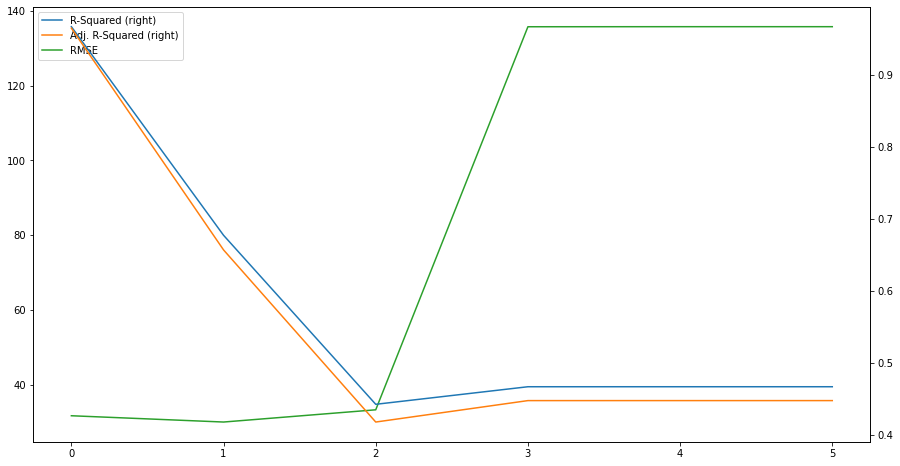

In [627]:
# plot the accuracy measure for all models
# secondary_y: specify the data on the secondary axis
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.show()

<table align="left">
    <tr>
        <td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The graph shows the performance metrics root mean squared error, R-squared and Adjusted R-squared of the models implemented: the X-axis has the model number as given in the table. The plot gives a clear picture of the inverse relation of R squared values and the RMSE value, the better the R-squared value naturally the lesser is the RMSE value.
                    <br><br> Findings suggest that the linear regression with interaction algorithm has the lowest accuracy with highest RMSE. Finally, it can be concluded that the linear regression with interaction cannot be used by bank/company who provides loan to predict loan amount for its customers.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>
